# Chronic Kidney Disease Prediction using Auto ML

## What is our ultimate aim with this notebook?

Our ultimate aim is to build a machine learning model using Auto ML that can predict if the person is suffering from Chronic Kidney Disease based on several medical parameters as mentioned below. 

## Column Description for our Dataset


##### Kaggle Dataset Link: https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease

### Target Variable/Dependent Variable

__ChronicKidneyDisease__ -  Did the customer buy travel insurance package during introductory offering held in the year 2019.    This is the variable we have to predict
Predictor Variables/Independent Variables


### Predictor Variables/Independent Variables

1. __Blood Pressure__ - A condition in which the force of the blood against the artery walls is too high.
2. __SpecificGravity__ - specific gravity, also called relative density, ratio of the density of a substance to that of a standard   substance.
3. __Albumin__-Albumin is a protein made by the liver. A albumin test measures the amount of this protein in the clear liquid       portion of the blood.
4. __Sugar__- A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126      mg/dL or higher indicates you have diabetes.
5. __RedBloodCell__- The results of RBC indices are used to diagnose different types of anemia.
6. __BloodUrea__ - The blood urea test measures how much urea nitrogen is in your blood.
7. __SerumCreatinine__ -A measurement of creatinine in your blood or urine provides clues to help your doctor determine how well the    kidneys are working.
8. __Sodium__-It helps maintain normal blood pressure, supports the work of your nerves and muscles, and regulates your body's fluid    balance. A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L).
9. __Pottasium__- Potassium is a chemical that is critical to the function of nerve and muscle cells, including those in your heart. Blood potassium level is normally 3.6 to 5.2 millimoles per liter (mmol/L)
10. __Hemoglobin__- Hemoglobin is a protein in red blood cells that carries oxygen.Normal results for adults vary, but in general       are:Male: 13.8 to 17.2 grams per deciliter (g/dL) or 138 to 172 grams per liter (g/L)
    Female: 12.1 to 15.1 g/dL or 121 to 151 g/L.
11. __WhiteBloodCellsCont__- The normal number of WBCs in the blood is 4,500 to 11,000 WBCs per microliter (4.5 to 11.0 × 109/L). 
12. __RedBloodCellsCont__- A normal RBC count would be around: men – 4.0 to 5.9 x 10*12/L. women – 3.8 to 5.2 x 10*12/L.
13. __Hypertension__- Having blood pressure measures consistently above normal may result in a diagnosis of  hypertension.

## What is Auto ML?
Automated Machine Learning (AutoML) is the process of automating tasks in the machine learning pipeline such as data preprocessing, hyperparameter tuning, model selection and evaluation. In this article we will examine how to utilize open source automated machine learning package from H2O to accelerate model development process.

# Setup
## Let’s import the necessary packages

In [84]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [85]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (16, 8)})

# Description of few important libraries
 __h2o__-h2o is a fast, open-source, in-memory, distributed, advanced analytics and modeling engine. It supports GLMs, gradient boosting, random forests, deep learning, and automatic machine learning.

__pprint__ is a library for pretty-printing data structures.

__operator__ provides functions to perform operations on sequences, such as sorting.

__matplotlib__ is a plotting library for creating charts, graphs, and other visualizations.

__tabulate__ is a library for creating tables in various formats.

__logging__ is a library for emitting log messages from applications.

__optparse__ is a library for parsing command-line options.

__psutil__ is a library for retrieving information on system utilization (CPU, memory, disks, network, sensors) and on running processes and system uptime.


In [86]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

## Why do we have to set runtime?
The value set for the maximum runtime in AutoML will depend on a variety of factors, including the size and complexity of your dataset, the number of models and hyperparameters you want to explore, and the computational resources available to you.
Also you can change the runtime values and check the model performance

min_mem_size = 6 typically refers to the minimum amount of memory (in gigabytes) that is required to run a particular software or process. It means that the system running the software or process must have at least 6 GB of available memory in order to run it without encountering memory-related issues.



In [87]:
#Calculating the minimum amount of memeory required
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

1


__Note__ :psutil library is used to retrieve system information, and must be installed

## Initialize the H2O cluster

In [12]:
# 65535 Highest port no
#generating a random port number between 5555 and 55555, which will be used to start the H2O server
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)


Checking whether there is an H2O instance running at http://localhost:20327 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Temurin-11.0.17+8 (build 11.0.17+8, mixed mode)
  Starting server from C:\Users\Dell\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Dell\AppData\Local\Temp\tmp6krbsopo
  JVM stdout: C:\Users\Dell\AppData\Local\Temp\tmp6krbsopo\h2o_Dell_started_from_python.out
  JVM stderr: C:\Users\Dell\AppData\Local\Temp\tmp6krbsopo\h2o_Dell_started_from_python.err
  Server is running at http://127.0.0.1:20327
Connecting to H2O server at http://127.0.0.1:20327 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_Dell_hld2hi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.977 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [13]:
# Reading CSV file into Pandas DataFrame
pandas_df = pd.read_csv(
    "https://raw.githubusercontent.com/Akshathapatil1998/ML_Data_Cleaning_and_Feature_Selection_Chronic_Kidney_Disease_Prediction/main/new_model.csv"
)  

In [14]:
#Renaming columns 
pandas_df = pandas_df.rename(columns={"Bp":"BloodPressure","Sg":"SpecificGravity","Al":"Albumin","Su":"Sugar","Rbc":"RedBloodCell","Bu":"BloodUrea","Sc":"SerumCreatinine","Sod":"Sodium","Pot":"Pottasium","Hemo":"Hemoglobin","Wbcc":"WhiteBloodCellsCont","Rbcc":"RedBloodCellsCont","Htn":"Hypertension","Class":"ChronicKidneyDisease"})

# Performing EDA

In [15]:
#Printing the summary of the dataframe for our Analysis like data types,null values and memory usage
pandas_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BloodPressure         400 non-null    float64
 1   SpecificGravity       400 non-null    float64
 2   Albumin               400 non-null    float64
 3   Sugar                 400 non-null    float64
 4   RedBloodCell          400 non-null    float64
 5   BloodUrea             400 non-null    float64
 6   SerumCreatinine       400 non-null    float64
 7   Sodium                400 non-null    float64
 8   Pottasium             400 non-null    float64
 9   Hemoglobin            400 non-null    float64
 10  WhiteBloodCellsCont   400 non-null    float64
 11  RedBloodCellsCont     400 non-null    float64
 12  Hypertension          400 non-null    float64
 13  ChronicKidneyDisease  400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [16]:
#Checking missing values in our data
pandas_df.isnull().sum()  

BloodPressure           0
SpecificGravity         0
Albumin                 0
Sugar                   0
RedBloodCell            0
BloodUrea               0
SerumCreatinine         0
Sodium                  0
Pottasium               0
Hemoglobin              0
WhiteBloodCellsCont     0
RedBloodCellsCont       0
Hypertension            0
ChronicKidneyDisease    0
dtype: int64

### Observations:
We have 0% missing values both in our independent variables as well as dependent variable

In [17]:
# Printing Shape of the dataframe 
pandas_df.shape 

(400, 14)

In [18]:
#Reading first 5 rows of data frame 
pandas_df.head() 

,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCell,BloodUrea,SerumCreatinine,Sodium,Pottasium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont,Hypertension,ChronicKidneyDisease
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [19]:
# Printing the name of all predictors and result
columns = list(pandas_df.columns)
print(columns)  

['BloodPressure', 'SpecificGravity', 'Albumin', 'Sugar', 'RedBloodCell', 'BloodUrea', 'SerumCreatinine', 'Sodium', 'Pottasium', 'Hemoglobin', 'WhiteBloodCellsCont', 'RedBloodCellsCont', 'Hypertension', 'ChronicKidneyDisease']


In [20]:
# Statistical description of our dataset
pandas_df.describe()  

,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCell,BloodUrea,SerumCreatinine,Sodium,Pottasium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont,Hypertension,ChronicKidneyDisease
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


<AxesSubplot:>

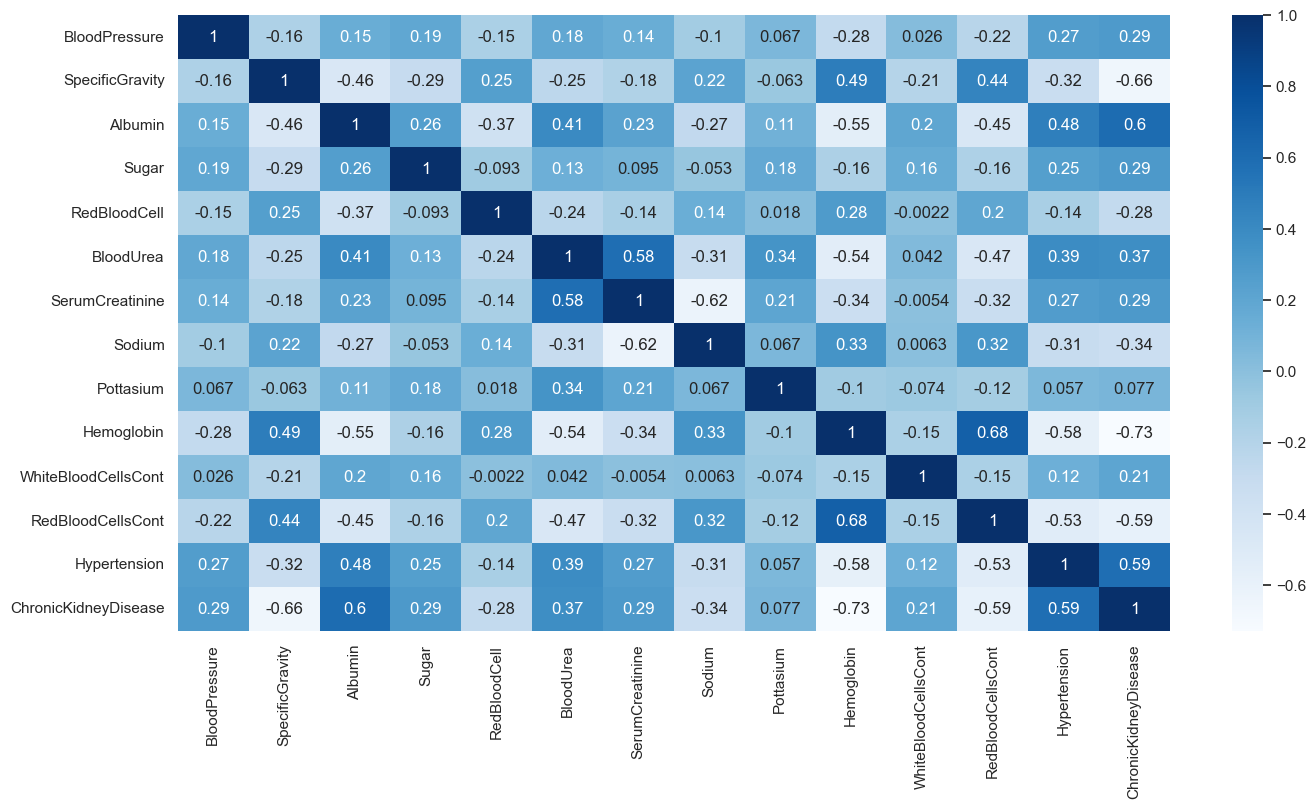

In [21]:
 # Heatmap showing correlation between the attributes.
sns.heatmap(
    pandas_df.corr(), annot=True, cmap="Blues"
) 

# Observations:
### Correlation Analysis
1. From the plots, we do not have much high correlation between features.
2. Red Blood Cell concentration and Hemoglobin are highly coorelated
3. Serum Creatinine and Blood urea has the coorelation value of 0.58

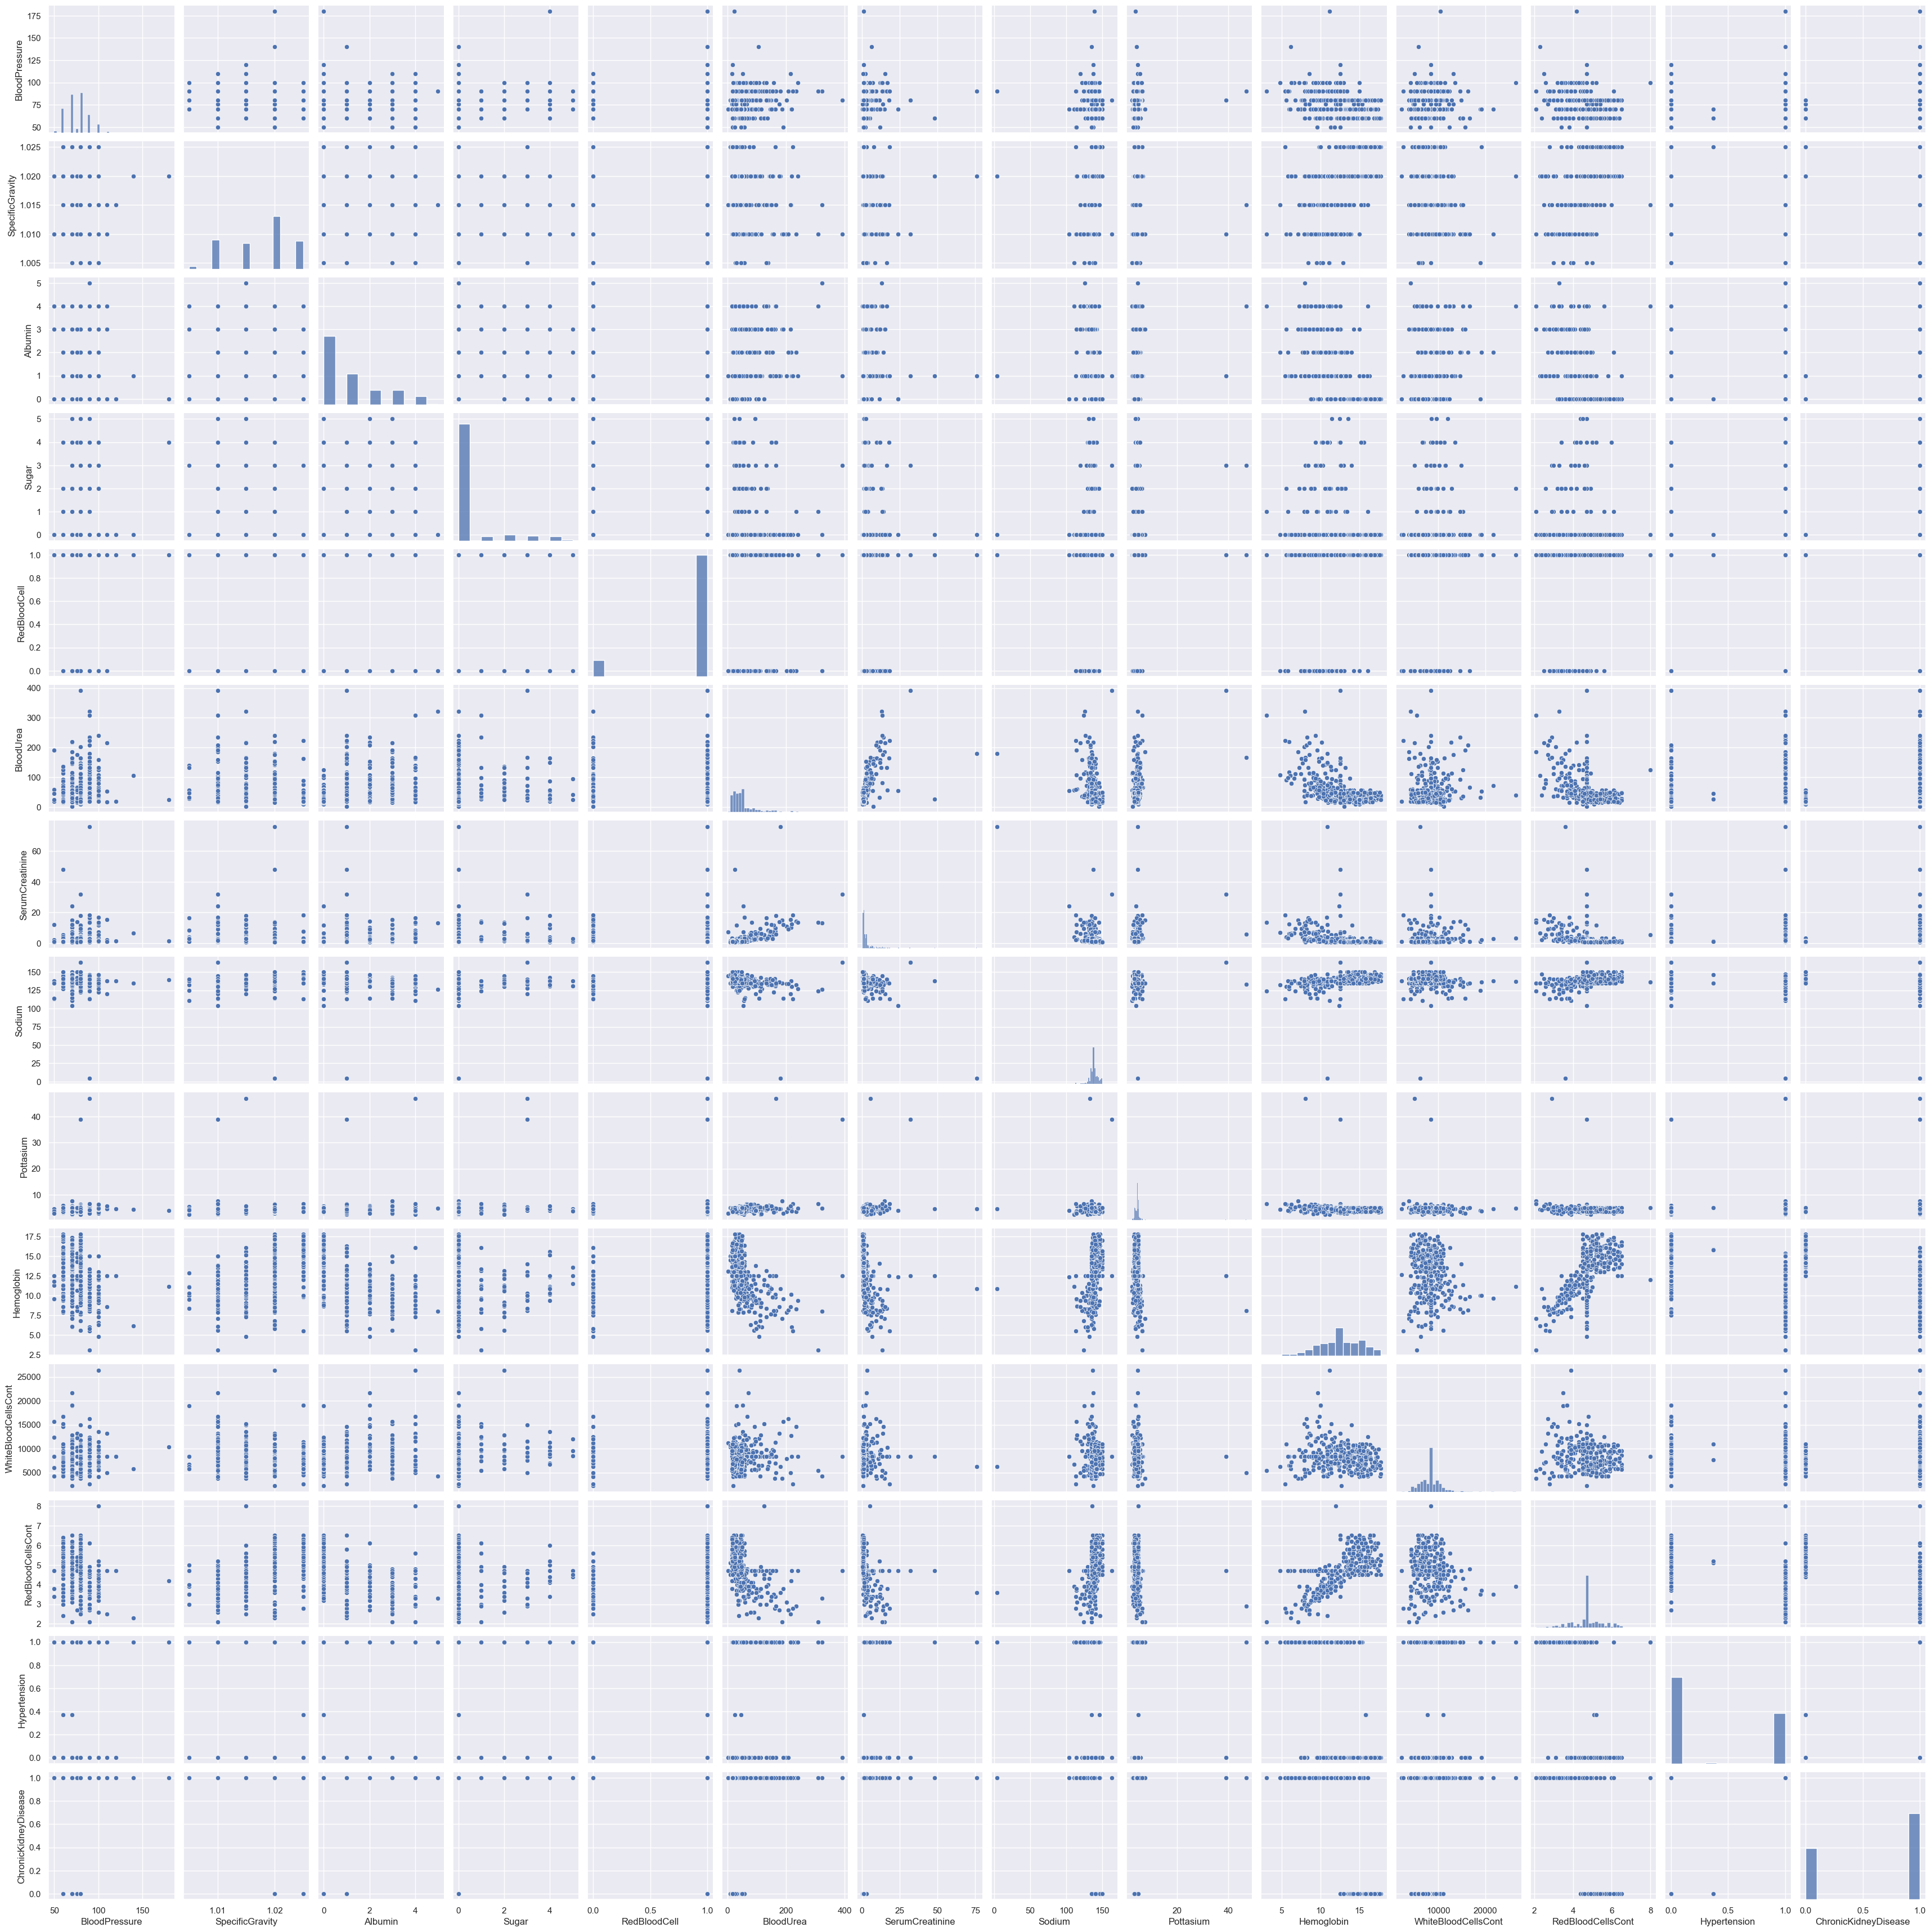

In [22]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(
    pandas_df
)  

array([[<AxesSubplot:title={'center':'BloodPressure'}>,
        <AxesSubplot:title={'center':'SpecificGravity'}>,
        <AxesSubplot:title={'center':'Albumin'}>,
        <AxesSubplot:title={'center':'Sugar'}>],
       [<AxesSubplot:title={'center':'RedBloodCell'}>,
        <AxesSubplot:title={'center':'BloodUrea'}>,
        <AxesSubplot:title={'center':'SerumCreatinine'}>,
        <AxesSubplot:title={'center':'Sodium'}>],
       [<AxesSubplot:title={'center':'Pottasium'}>,
        <AxesSubplot:title={'center':'Hemoglobin'}>,
        <AxesSubplot:title={'center':'WhiteBloodCellsCont'}>,
        <AxesSubplot:title={'center':'RedBloodCellsCont'}>],
       [<AxesSubplot:title={'center':'Hypertension'}>,
        <AxesSubplot:title={'center':'ChronicKidneyDisease'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

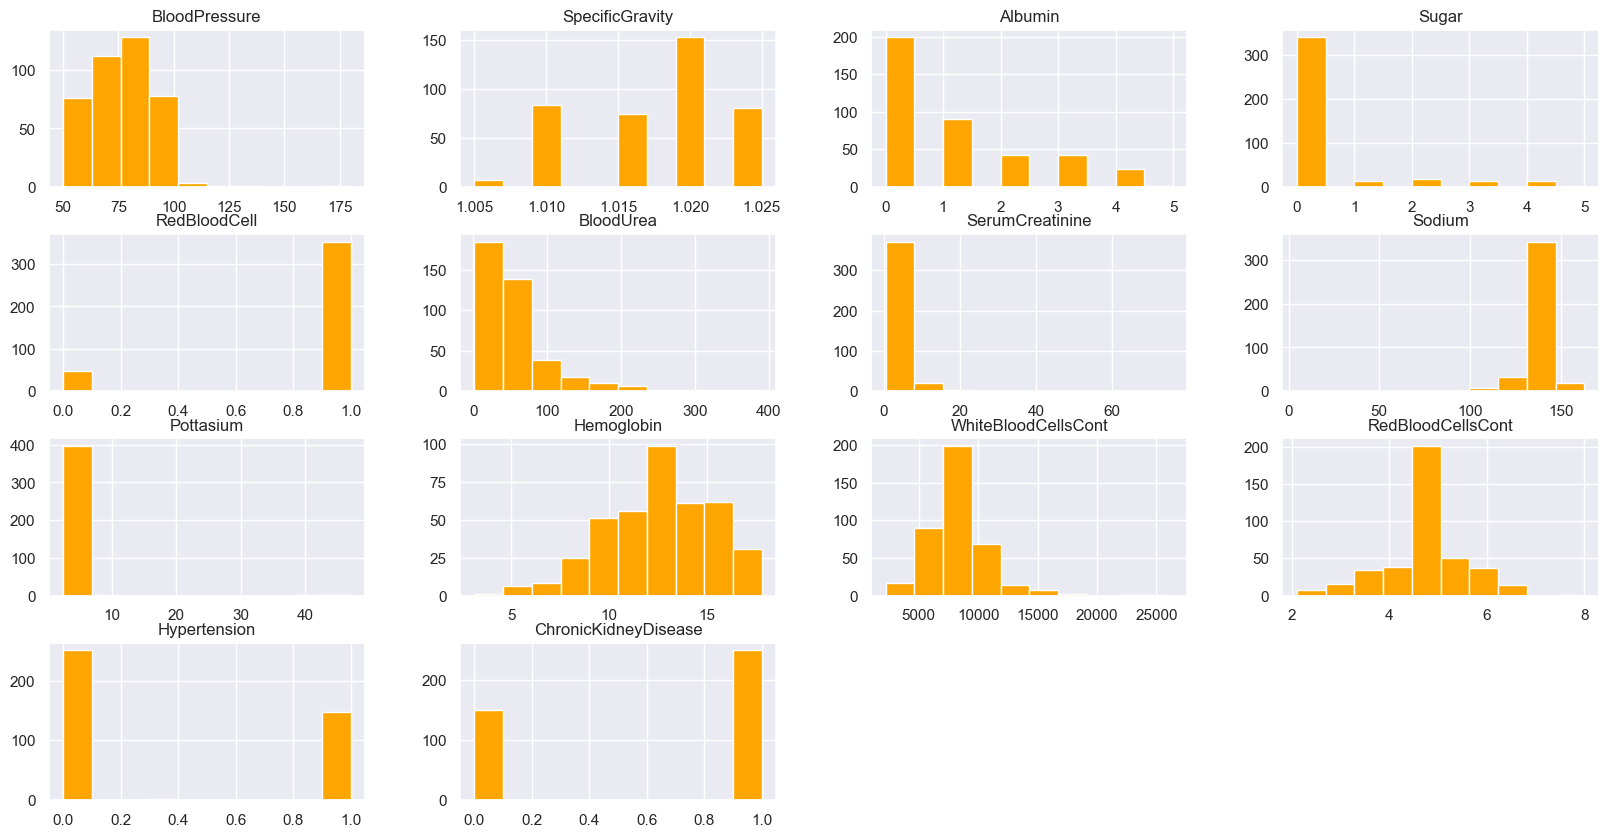

In [23]:
# Plotted Histogram
pandas_df.hist(color="orange", figsize=(20, 10))  

In [24]:
# Converted Pandas Dataframe to H2O dataframe to proceed with AutoML
df = h2o.H2OFrame(
    pandas_df
)  

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [25]:
 # Datatype of all attributes, here the result ("ChronicKidneyDisease") is int hence it can be solved using the regression. If this problem was supposed to solved using the classification
df.types 

{'BloodPressure': 'int',
 'SpecificGravity': 'real',
 'Albumin': 'int',
 'Sugar': 'int',
 'RedBloodCell': 'int',
 'BloodUrea': 'real',
 'SerumCreatinine': 'real',
 'Sodium': 'real',
 'Pottasium': 'real',
 'Hemoglobin': 'real',
 'WhiteBloodCellsCont': 'int',
 'RedBloodCellsCont': 'real',
 'Hypertension': 'real',
 'ChronicKidneyDisease': 'int'}

In [26]:
# Setting up the data split between training and test dataset.
pct_rows = 0.80  
df_train, df_test = df.split_frame([pct_rows])

In [27]:
print(df_train.shape)
print(df_test.shape)

(330, 14)
(70, 14)


In [28]:
df_train.head()

BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCell,BloodUrea,SerumCreatinine,Sodium,Pottasium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont,Hypertension,ChronicKidneyDisease
80,1.02,1,0,1,36,1.2,137.53,4.63,15.4,7800,5.2,1,1
50,1.02,4,0,1,18,0.8,137.53,4.63,11.3,6000,4.71,0,1
80,1.01,2,3,1,53,1.8,137.53,4.63,9.6,7500,4.71,0,1
70,1.005,4,0,1,56,3.8,111,2.5,11.2,6700,3.9,1,1
80,1.01,2,0,1,26,1.4,137.53,4.63,11.6,7300,4.6,0,1
90,1.015,3,0,1,25,1.1,142,3.2,12.2,7800,4.4,1,1
70,1.01,0,0,1,54,24,104,4,12.4,8406,4.71,0,1
76,1.015,2,4,1,31,1.1,137.53,4.63,12.4,6900,5,0,1
90,1.02,2,0,0,107,7.2,114,3.7,9.5,12100,3.7,1,1
70,1.01,3,0,0,60,2.7,131,4.2,10.8,4500,3.8,1,1


In [29]:
df_test.head()

BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCell,BloodUrea,SerumCreatinine,Sodium,Pottasium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont,Hypertension,ChronicKidneyDisease
100,1.015,3,0,1,60,1.9,137.53,4.63,10.8,9600,4,1,1
60,1.01,2,4,1,55,4,137.53,4.63,9.4,8406,4.71,1,1
70,1.02,1,0,1,86,4.6,135,3.4,9.8,8406,4.71,1,1
70,1.01,3,4,1,87,2.7,130,4,12.5,9600,4.1,1,1
70,1.005,1,0,0,28,1.4,137.53,4.63,12.9,8406,4.71,0,1
90,1.02,2,1,0,39,2,137.53,4.63,12,9800,4.9,1,1
100,1.01,0,0,1,29,1,139,4.2,9.7,9200,4.5,1,1
80,1.01,1,0,0,202,10.8,134,3.4,7.9,7900,3.1,0,1
70,1.015,0,0,1,24,1.2,142,4.2,12.4,6400,4.7,0,1
80,1.01,3,0,1,17,0.8,137.53,4.63,15,8600,4.71,0,1


In [30]:
X = df.columns
print(X)

['BloodPressure', 'SpecificGravity', 'Albumin', 'Sugar', 'RedBloodCell', 'BloodUrea', 'SerumCreatinine', 'Sodium', 'Pottasium', 'Hemoglobin', 'WhiteBloodCellsCont', 'RedBloodCellsCont', 'Hypertension', 'ChronicKidneyDisease']


In [31]:
# Set target and predictor variables
y = "ChronicKidneyDisease"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['BloodPressure', 'SpecificGravity', 'Albumin', 'Sugar', 'RedBloodCell', 'BloodUrea', 'SerumCreatinine', 'Sodium', 'Pottasium', 'Hemoglobin', 'WhiteBloodCellsCont', 'RedBloodCellsCont', 'Hypertension']


## Train AutoML Models

In [32]:
# Setting of AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  

#### Start the training by specifying:

1. training_frame: the dataframe that contains training data -- df_train in our case
2. y: the column in the training_frame which contains the target variable -- Chronic Kidney Disease in our case

In [33]:
# Trainig the dataset on different models
aml.train(x=X, y=y, training_frame=df_train)  

AutoML progress: |
11:35:45.794: AutoML: XGBoost is not available; skipping it.
11:35:45.885: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


11:35:46.582: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
11:35:47.960: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
11:35:48.94: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical befo

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.0182398,0.0071689,0.0188127,0.0116285,0.0212769,0.0283373,0.0111439
mean_residual_deviance,0.0064923,0.0056802,0.0079830,0.0013299,0.0059126,0.0153564,0.0018797
mse,0.0064923,0.0056802,0.0079830,0.0013299,0.0059126,0.0153564,0.0018797
r2,0.9659124,0.036546,0.9648731,0.9927088,0.975606,0.9040227,0.9923512
residual_deviance,0.0064923,0.0056802,0.0079830,0.0013299,0.0059126,0.0153564,0.0018797
rmse,0.0739969,0.0356503,0.0893476,0.036468,0.0768932,0.1239208,0.0433550
rmsle,0.0490073,0.0276510,0.0672222,0.0209559,0.0466526,0.0855970,0.0246088


# So what goes on under the hood?

#### H2O AutoML trains and cross validates the following models in the following order:

1. Three pre-specified XGBoost GBM (Gradient Boosting Machine) models
2. A fixed grid of GLMs
3. A default Random Forest (DRF)
4. Five pre-specified H2O GBMs
5. A near-default Deep Neural Net
6. An Extremely Randomized Forest (XRT)
7. A random grid of XGBoost GBMs
8. A random grid of H2O GBMs
9. A random grid of Deep Neural Nets

## Interpretting the above training output:

__The reported metrics are for the Gradient Boosting Machinemodel in H2O AutoML. The metrics are reported separately for the training data and the cross-validation data.__


#### For the training data:

1. __Mean Squared Error (MSE) is__ 0.00213, which measures the average squared difference between the predicted and actual values.
2. __Root Mean Squared Error (RMSE)__ is 0.0462, which is the square root of MSE and provides a measure of how well the model fits the data.
3. __Mean Absolute Error (MAE) is__ 0.0203, which measures the average absolute difference between the predicted and actual values.
4. __Root Mean Squared Log Error (RMSLE) is__ 0.03519, which is the RMS of the logarithmic differences between the predicted and actual values.

#### For the cross-validation data:

The metrics are generally worse than for the training data, which is expected since the model was not trained on this data.
The R^2 is 0.6821, which is still a reasonable fit but lower than for the training data.
The other metrics are also not comparable, indicating that the model is slightly overfitting on the dataset because there is a significant difference in the metrics on the training and validation datasets.


__Scoring History__: This section shows the training history of the model during the iterative training process. It displays the duration of each training iteration, the number of trees in the model, the RMSE, MAE, and deviance of the training dataset.

__Importances__: This section provides information on the relative importance of each feature in the model. The relative importance is calculated by the algorithm and represents the extent to which each feature contributes to the model's performance. It is often used to identify the most important features for making predictions.




## Evaluation:
After the models are trained, we can compare the model performance using the leaderboard. H2O AutoML produces a leaderboard which ranks the trained model based on a predefined metric. By default it ranks models by ascending order of logloss and rmse for classification and regression task respectively.

In [34]:
# Leaderboard showing the performance of different models on the dataset.

lb=aml.leaderboard 
lb.head(rows=lb.nrows)



model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_5_AutoML_1_20230223_113545,0.078359,0.00614013,0.0177786,0.0532614,0.00614013
GBM_grid_1_AutoML_1_20230223_113545_model_174,0.101931,0.0103899,0.0486453,0.0719037,0.0103899
StackedEnsemble_BestOfFamily_4_AutoML_1_20230223_113545,0.102851,0.0105783,0.0546206,0.0725004,0.0105783
GBM_grid_1_AutoML_1_20230223_113545_model_235,0.10541,0.0111113,0.0447378,0.07374,0.0111113
GBM_grid_1_AutoML_1_20230223_113545_model_127,0.109652,0.0120237,0.0482412,0.0766708,0.0120237
GBM_grid_1_AutoML_1_20230223_113545_model_66,0.110366,0.0121808,0.0573626,0.0782252,0.0121808
GBM_grid_1_AutoML_1_20230223_113545_model_96,0.110804,0.0122775,0.0526036,0.0791826,0.0122775
GBM_grid_1_AutoML_1_20230223_113545_model_244,0.110994,0.0123197,0.0464211,0.0749449,0.0123197
GBM_grid_1_AutoML_1_20230223_113545_model_158,0.112054,0.0125562,0.0585064,0.0781424,0.0125562
GBM_grid_1_AutoML_1_20230223_113545_model_178,0.11213,0.0125731,0.0500217,0.0771547,0.0125731


By looking at the leaderboard, we can see that the best model is the Gradient Boosting Model with the best model from each family, meaning that this model was built using the best model of each of the trained algorithms. 

In [35]:
#printing the best model
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_5_AutoML_1_20230223_113545

No summary for this model

ModelMetricsRegression: stackedensemble
** Reported on train data. **

MSE: 0.0006716712709961182
RMSE: 0.025916621519714297
MAE: 0.006705671734786577
RMSLE: 0.014750154705950537
Mean Residual Deviance: 0.0006716712709961182

ModelMetricsRegression: stackedensemble
** Reported on cross-validation data. **

MSE: 0.006140126752079794
RMSE: 0.07835896089203706
MAE: 0.01777861529203262
RMSLE: 0.053261390180887706
Mean Residual Deviance: 0.006140126752079794

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.0182398  0.0071689   0.0188127     0.0116285     0.0212769     0.0283373     0.0111439
mean_re

# How did AutoML pick this model?

The model that was probably chosen as the best model is the "GBM_lr_annealing_selection_AutoML_3_20230220_131402" model because it has the lowest RMSE, which is a commonly used measure of the prediction error in regression problems. However, it is important to evaluate the model based on other metrics and use cross-validation to get a more accurate estimate of the model's performance on unseen data.

In [36]:
#assign index values to all the models generated
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict



{'StackedEnsemble_BestOfFamily_5_AutoML_1_20230223_113545': 0,
 'GBM_grid_1_AutoML_1_20230223_113545_model_174': 1,
 'GLM_1_AutoML_1_20230223_113545': 293}

In [37]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

1


In [38]:
best_model.algo

'gbm'

In [39]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

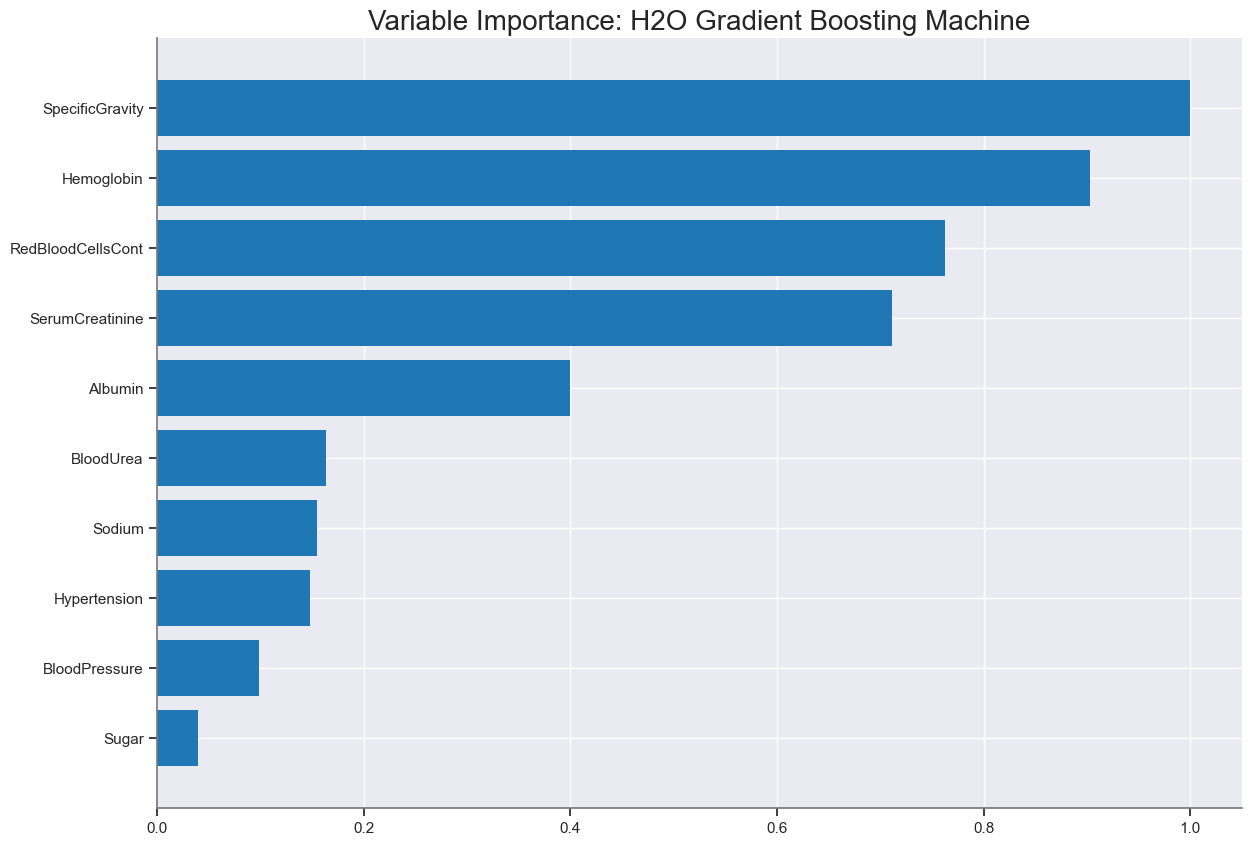

<Figure size 1600x800 with 0 Axes>

In [40]:
# Importance of all the variables in GBM algorithm.
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost"
    "StackedEnsemble",
]:
    best_model.varimp_plot()

### Observations:

The above graph is a variable Importance Graph on the H20's Distributed Gradient boosting Machine Model
- We can Interpret that Hemoglobin is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)


<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Dell\AppData\Local\Temp\ipykernel_3732\537718518.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


293
glm


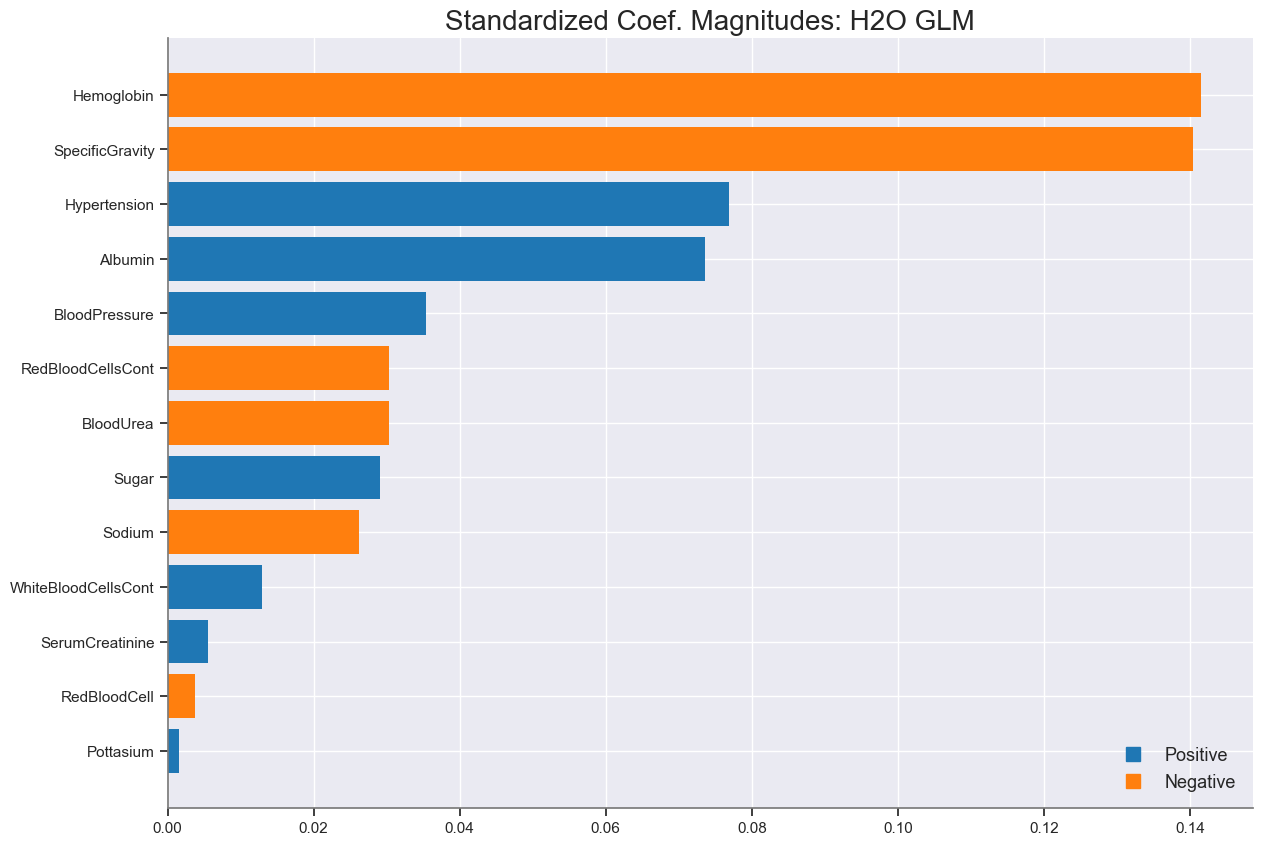

In [88]:
#standardized coef Magnitudes for h20 GML
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

### Analysis:
Standardized coefficient magnitudes (sometimes referred to as standardized coefficients or beta coefficients) are a measure of the importance of each input variable in a predictive model, after standardizing all variables to have a mean of zero and a standard deviation of one. The values of standardized coefficient magnitudes can range from negative infinity to positive infinity, but they are typically expressed as a percentage.

The values on standardized coefficient magnitudes represent the relative importance of each input variable in the model, after taking into account the scale of the variable. A higher magnitude value indicates that the variable has a stronger impact on the outcome variable, while a lower value indicates a weaker impact.

In [42]:
print(best_model.rmse(train=True))

0.040954320679365434


# Now, let's see how the best model performs on our test set.

In [43]:
aml.leader.model_performance(test_data=df_test)

ModelMetricsRegression: stackedensemble
** Reported on test data. **

MSE: 0.0041514910949777585
RMSE: 0.06443206573576357
MAE: 0.0172461731023029
RMSLE: 0.047945102171966555
Mean Residual Deviance: 0.0041514910949777585

In [44]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [45]:
# Predictions on Test Dataset using the best model from the leaderboard.
y_pred = h2o.as_list(
    predictions
)  
print(y_pred)

     predict
0   1.007439
1   1.004094
2   1.001072
3   1.000484
4   1.012487
..       ...
65 -0.017858
66  0.003453
67  0.010820
68 -0.009925
69 -0.008658

[70 rows x 1 columns]


# Regularization

In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

- Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization ability.

- Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

- Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By setting some coefficients to zero, Lasso can effectively remove irrelevant variables from the model, which can lead to a simpler and more interpretable model.

- The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.

By adding regularization to a model, it can become less prone to overfitting and better at generalizing to new data.

In [46]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

disease_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
disease_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
disease_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
disease_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [47]:
disease_glm.train(x=X, y=y, training_frame=df_train)


glm Model Build progress: |

C:\Users\Dell\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:193: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,None,13,13,1,py_2_sid_b3a4
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.2358737,0.0259229,0.2485807,0.2734348,0.2057405,0.2273809,0.2242314
mean_residual_deviance,0.0820170,0.0196787,0.0889639,0.1124821,0.0617222,0.0707891,0.0761276
mse,0.0820170,0.0196787,0.0889639,0.1124821,0.0617222,0.0707891,0.0761276
null_deviance,15.194975,3.133536,12.572487,15.7102,18.259516,11.378397,18.054277
r2,0.6322707,0.1056469,0.6031426,0.4657602,0.7428241,0.6641102,0.6855162
residual_deviance,5.4262953,1.6888977,4.981978,8.211192,4.629165,3.751825,5.5573163
rmse,0.2848132,0.0335121,0.2982682,0.3353835,0.2484395,0.2660623,0.2759123
rmsle,0.1806424,0.0164333,0.1870567,0.2066568,0.1719130,0.1704202,0.1671654


# Ridge Regularization

In [48]:
disease_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 3.423E-4 ),13,13,1,py_2_sid_b3a4
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.2300263,0.0130941,0.2168264,0.2413968,0.2148317,0.2367346,0.2403419
mean_residual_deviance,0.0754038,0.0075510,0.0667778,0.0857659,0.0713874,0.0728317,0.0802561
mse,0.0754038,0.0075510,0.0667778,0.0857659,0.0713874,0.0728317,0.0802561
null_deviance,15.139622,2.0783594,15.595295,18.20288,15.382966,13.783151,12.733818
r2,0.6686611,0.0373015,0.7244894,0.6230072,0.6787567,0.6638731,0.6531792
residual_deviance,4.9992967,1.0737075,4.2070036,6.8612685,4.9257298,4.5883985,4.4140835
rmse,0.2743250,0.0136739,0.2584141,0.2928581,0.2671842,0.2698735,0.283295
rmsle,0.1749840,0.0116877,0.1703797,0.1895712,0.1639947,0.1657109,0.1852636


# Lasso Regularization

In [49]:
disease_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 3.423E-4 ),13,12,1,py_2_sid_b3a4
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.2374077,0.0210933,0.2161854,0.2426506,0.2178688,0.2671937,0.2431403
mean_residual_deviance,0.0847268,0.0117483,0.0772723,0.0983657,0.0693693,0.0933492,0.0852779
mse,0.0847268,0.0117483,0.0772723,0.0983657,0.0693693,0.0933492,0.0852779
null_deviance,15.147844,1.3636018,16.588379,15.117856,14.263132,16.375,13.394855
r2,0.6265219,0.0593855,0.6545771,0.5636725,0.7154284,0.6001653,0.5987661
residual_deviance,5.616873,1.0809476,5.718148,6.5904994,3.954048,6.5344415,5.287227
rmse,0.2905094,0.0203447,0.2779789,0.313633,0.2633804,0.3055310,0.2920237
rmsle,0.1823301,0.0110582,0.1848046,0.1806491,0.1703652,0.1996339,0.1761976


## Did Regularization Method Help?

The Lasso regularization appears to have the same MSE, RMSE, MAE, and RMSLE values compared to the non-regularized and Ridge regularized models, indicating no improvement in performance. The R-squared value also decreased from 0.683 to 0.653 in cross validation data, indicating a worse fit to the data.

Here, we can observe that after applying the ridge regularization, there are barely or no improvements in the evaluation metrics on the train data and  cross validation data, hence it can be concluded that  regularization technique is not so helpful to  avoid the overfitting of model 



In [50]:
lambda_search = disease_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [51]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677170105885_29


GLM Model: summary
    family    link      regularization                                lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.00195 )  nlambda = 100, lambda.max = 0.6846, lambda.min = 0.00195, lambda.1se = -1.0  13                            12                             64                      py_2_sid_b3a4

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06936058238064076
RMSE: 0.26336397320180444
MAE: 0.2229908132495341
RMSLE: 0.17006879661187446
Mean Residual Deviance: 0.06936058238064076
R^2: 0.6969075309477237
Null degrees of freedom: 329
Residual degrees of freedom: 317
Null deviance: 75.5181818181823
Residual deviance: 22.88899218561145
AIC: 83.9153703973496

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse        training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  -------------------  -------------------  ------------------  ------------------
     2023-02-23 11:39:35  0.000 sec   1            .68E0     1             0.2288429752066115   0.5
     2023-02-23 11:39:35  0.002 sec   2            .62E0     2             0.21347501907985744  0.5
     2023-02-23 11:39:35  0.006 sec   3            .57E0     3             0.19839652505392383  0.5
     2023-02-23 11:39:35  0.008 sec   4            .52E0     3             0.18185656347247475  0.5
     2023-02-23 11:39:35  0.008 sec   5            .47E0     3             0.16754564566838756  0.5
     2023-02-23 11:39:35  0.009 sec   6            .43E0     3             0.15520224092165594  0.5
     2023-02-23 11:39:35  0.009 sec   7            .39E0     5             0.14276112711905034  0.5
     2023-02-23 11:39:35  0.053 sec   8            .36E0     5             0.13179633487862868  0.5
     2023-02-23 11:39:35  0.054 sec   9            .33E0     5             0.12251190936352757  0.5
     2023-02-23 11:39:35  0.056 sec   10           .3E0      5             0.11466151619821506  0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                  ---                  ---                 ---
     2023-02-23 11:39:35  0.089 sec   55           .45E-2    13            0.06941889091907431  0.5
     2023-02-23 11:39:35  0.089 sec   56           .41E-2    13            0.06940668022610322  0.5
     2023-02-23 11:39:35  0.090 sec   57           .37E-2    13            0.0693965949291018   0.5
     2023-02-23 11:39:35  0.093 sec   58           .34E-2    13            0.06938817855765374  0.5
     2023-02-23 11:39:35  0.093 sec   59           .31E-2    13            0.06938117869210299  0.5
     2023-02-23 11:39:35  0.094 sec   60           .28E-2    13            0.06937535886644682  0.5
     2023-02-23 11:39:35  0.094 sec   61           .26E-2    13            0.06937056521631367  0.5
     2023-02-23 11:39:35  0.095 sec   62           .23E-2    13            0.0693667244746054   0.5
     2023-02-23 11:39:35  0.095 sec   63           .21E-2    13            0.06936337332741092  0.5
     2023-02-23 11:39:35  0.096 sec   64           .19E-2    13            0.06936058238064108  0.5      64            0.26336397320180444  0.06936058238064076  0.2229908132495341  0.6969075309477237
[64 rows x 13 columns

The function will search for the optimal value of lambda that minimizes the error in the model fit, and will return the results of this search in the object "lambda_search". This object can then be used to access the results of the search and select the optimal lambda value.

In [52]:
#extracting the coeffecients table from GLM Model
coeff_table = disease_glm._model_json["output"]["coefficients_table"]

In [53]:
# Z-Value and P-Value showing the significance of each attributes.
coeff_table.as_data_frame()  

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,30.289400,3.383375,8.952423,3.040594e-17,0.645455
1,BloodPressure,0.002621,0.001195,2.194133,2.895361e-02,0.035216
2,SpecificGravity,-28.271692,3.361242,-8.411085,1.418830e-15,-0.153492
3,Albumin,0.060039,0.015957,3.762471,2.004938e-04,0.075961
4,Sugar,0.027828,0.016080,1.730582,8.450256e-02,0.028460
5,RedBloodCell,0.000034,0.052882,0.000638,9.994917e-01,0.000011
6,BloodUrea,-0.000967,0.000432,-2.235303,2.609580e-02,-0.049487
7,SerumCreatinine,0.001685,0.003815,0.441521,6.591375e-01,0.010141
8,Sodium,-0.002466,0.002111,-1.168053,2.436659e-01,-0.024053
9,Pottasium,0.001585,0.005492,0.288544,7.731193e-01,0.004897


# Explainability
H2O AutoML also provides insights into model’s global explainability such as variable importance, partial dependence plot, SHAP values and model correlation with just one line of code

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20230223_113545_model_58,0.02479,0.000614544,0.0160835,0.0152348,0.000614544,213,0.009152,GBM
GBM_grid_1_AutoML_1_20230223_113545_model_120,0.0257837,0.0006648,0.0146148,0.0151195,0.0006648,74,0.010991,GBM
GBM_grid_1_AutoML_1_20230223_113545_model_87,0.0267147,0.000713677,0.0106662,0.0176139,0.000713677,206,0.015721,GBM
GBM_grid_1_AutoML_1_20230223_113545_model_188,0.0269888,0.000728396,0.0117248,0.0224311,0.000728396,192,0.033627,GBM
GBM_grid_1_AutoML_1_20230223_113545_model_47,0.0269899,0.000728455,0.0111811,0.0220543,0.000728455,150,0.027534,GBM
GBM_grid_1_AutoML_1_20230223_113545_model_181,0.0390297,0.00152332,0.0144095,0.0311197,0.00152332,114,0.02158,GBM
GBM_grid_1_AutoML_1_20230223_113545_model_231,0.0416402,0.00173391,0.0179265,0.0280436,0.00173391,72,0.025354,GBM
GBM_grid_1_AutoML_1_20230223_113545_model_258,0.0423524,0.00179372,0.020007,0.0315221,0.00179372,96,0.012775,GBM
GBM_grid_1_AutoML_1_20230223_113545_model_259,0.0435631,0.00189774,0.0240088,0.0338938,0.00189774,150,0.022418,GBM
GBM_grid_1_AutoML_1_20230223_113545_model_235,0.0459243,0.00210904,0.0238003,0.0319415,0.00210904,163,0.02638,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

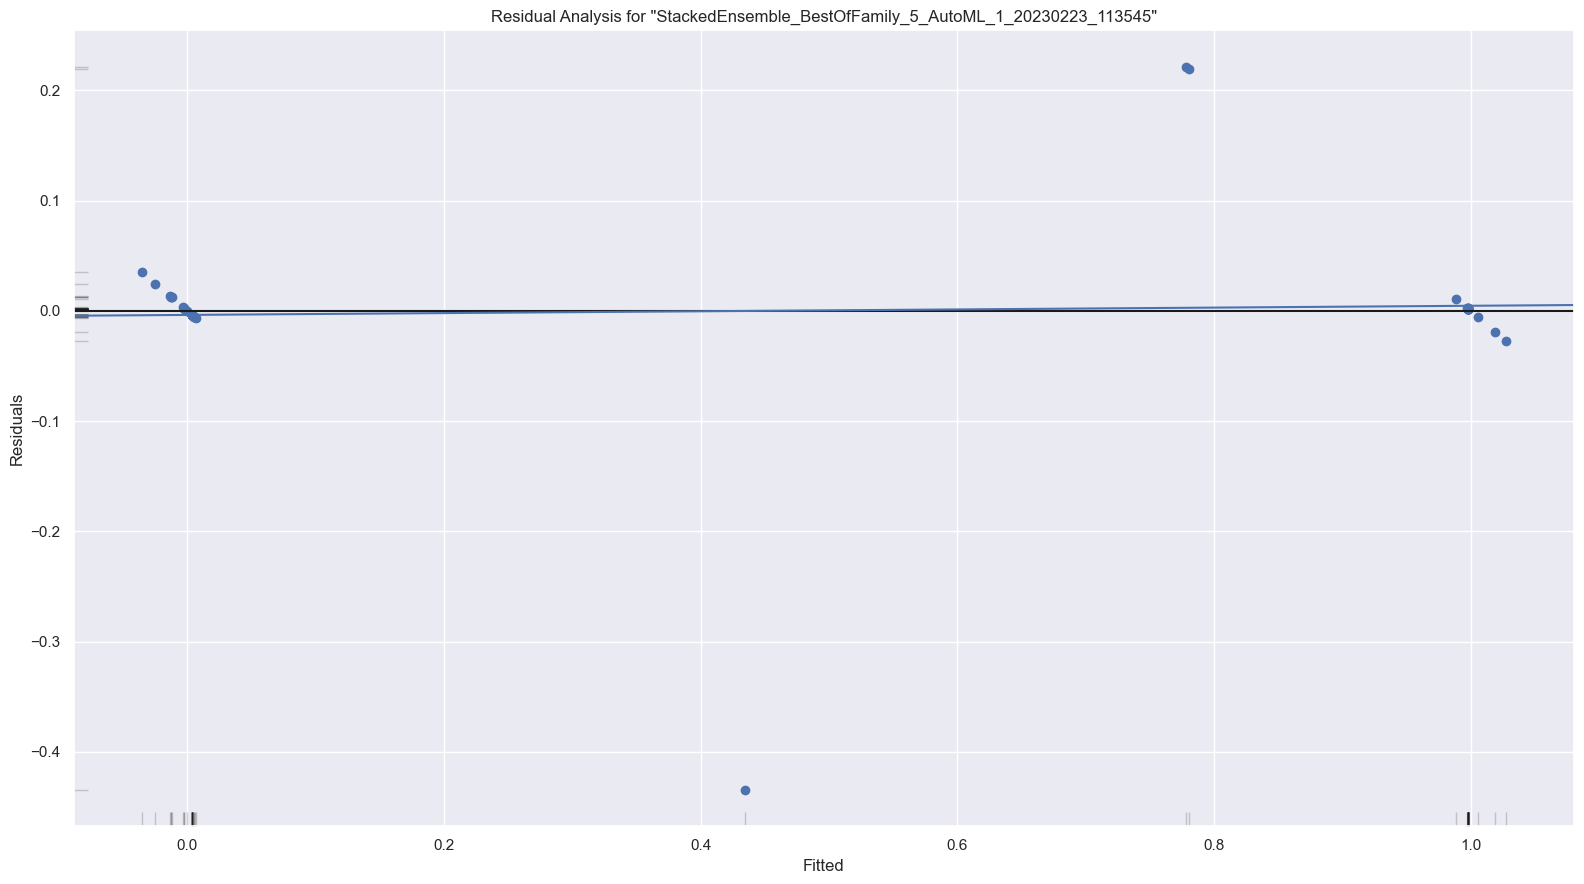

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

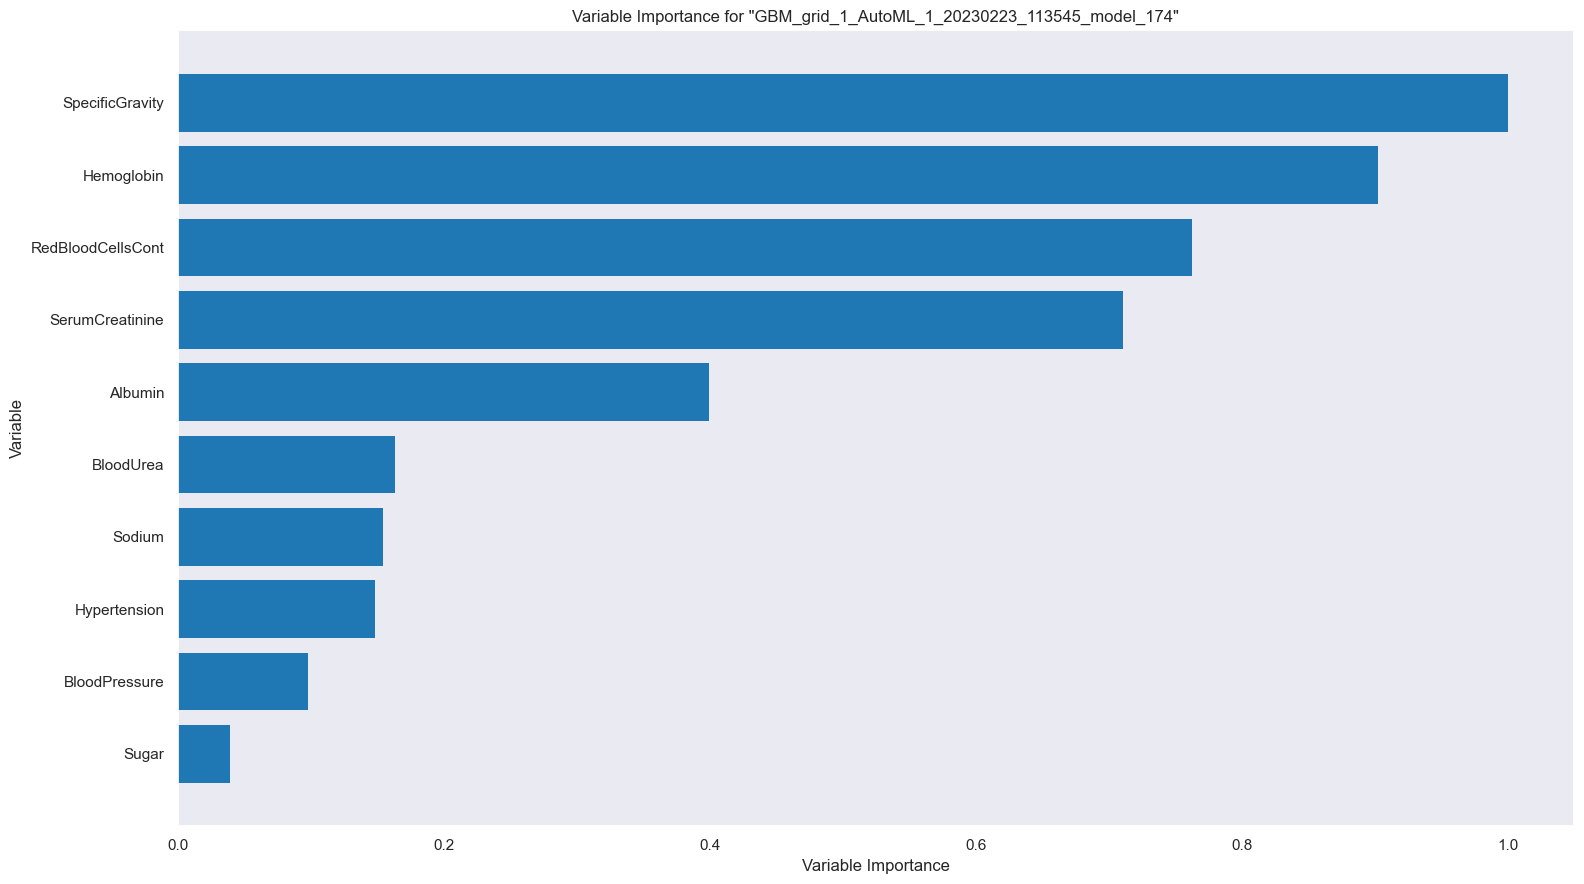

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

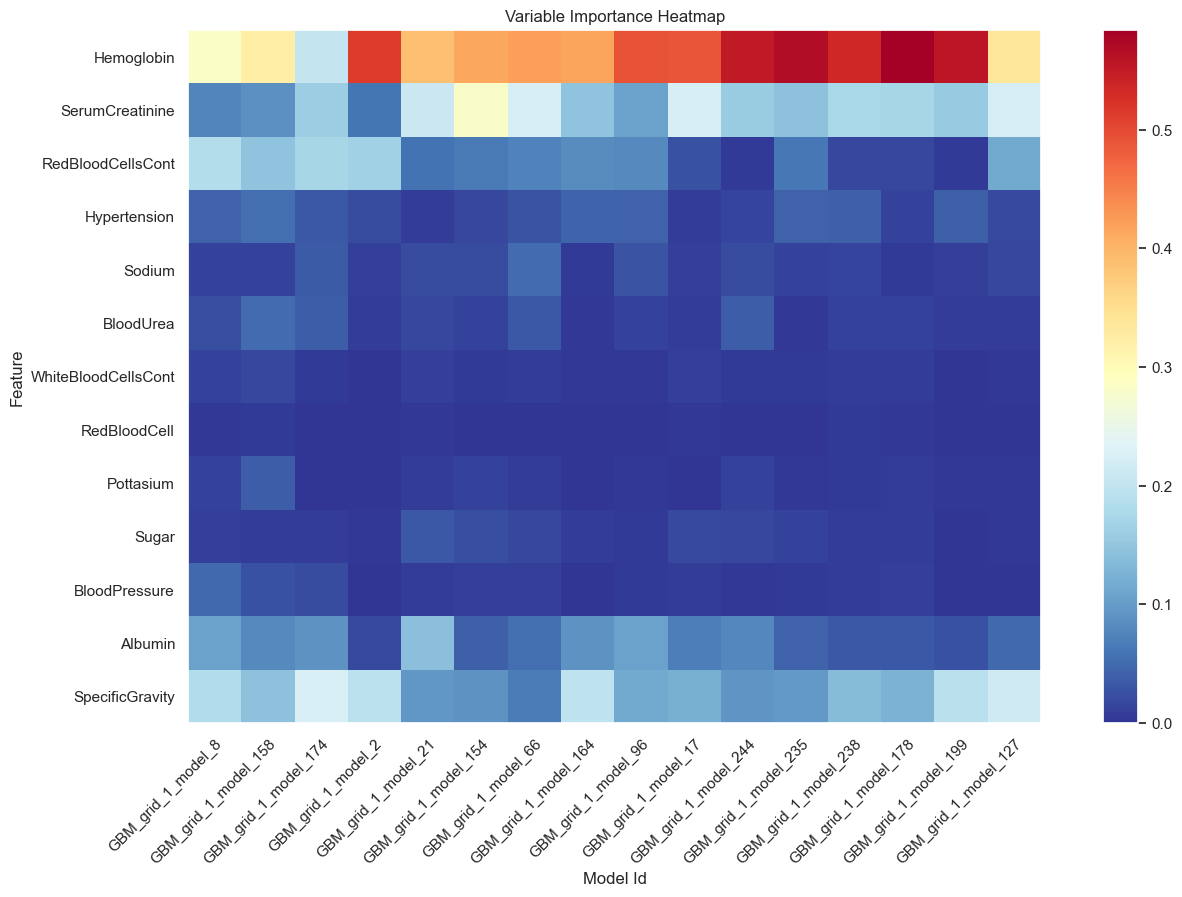

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

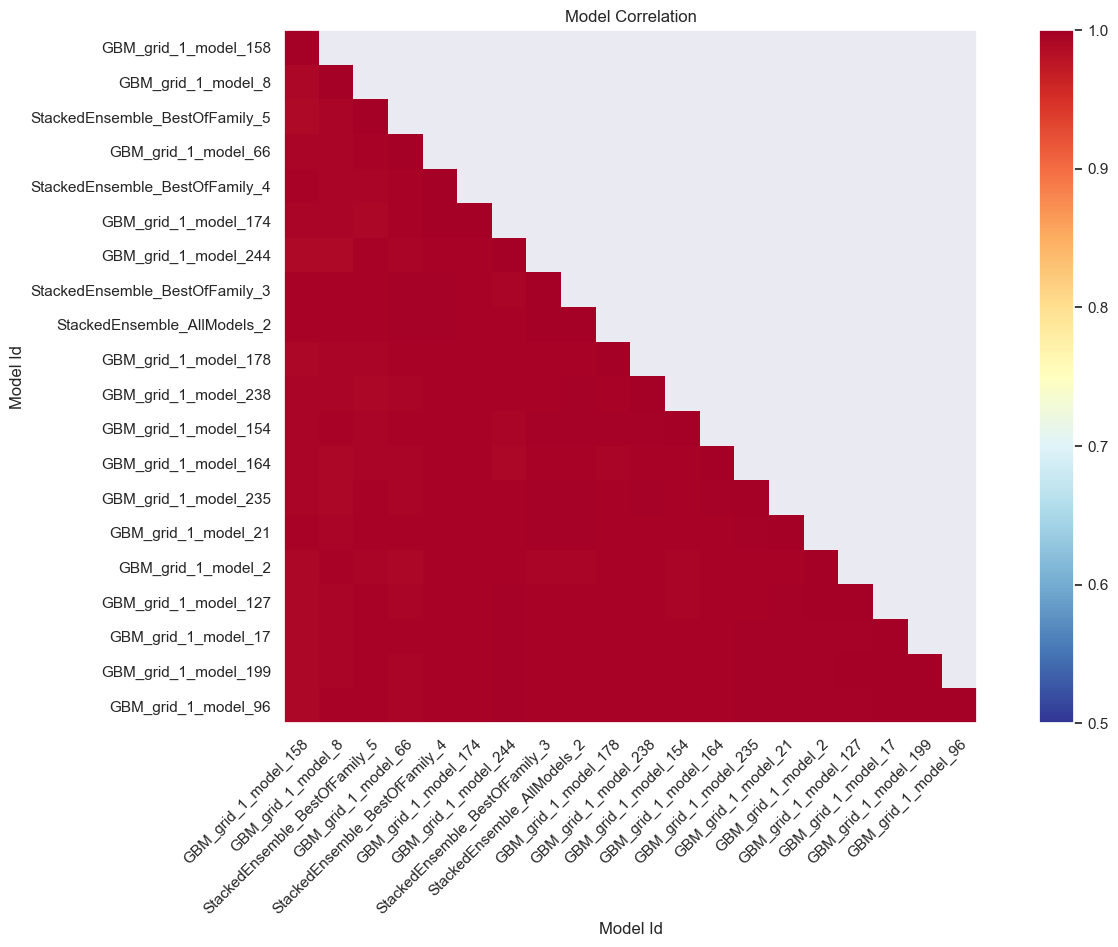

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

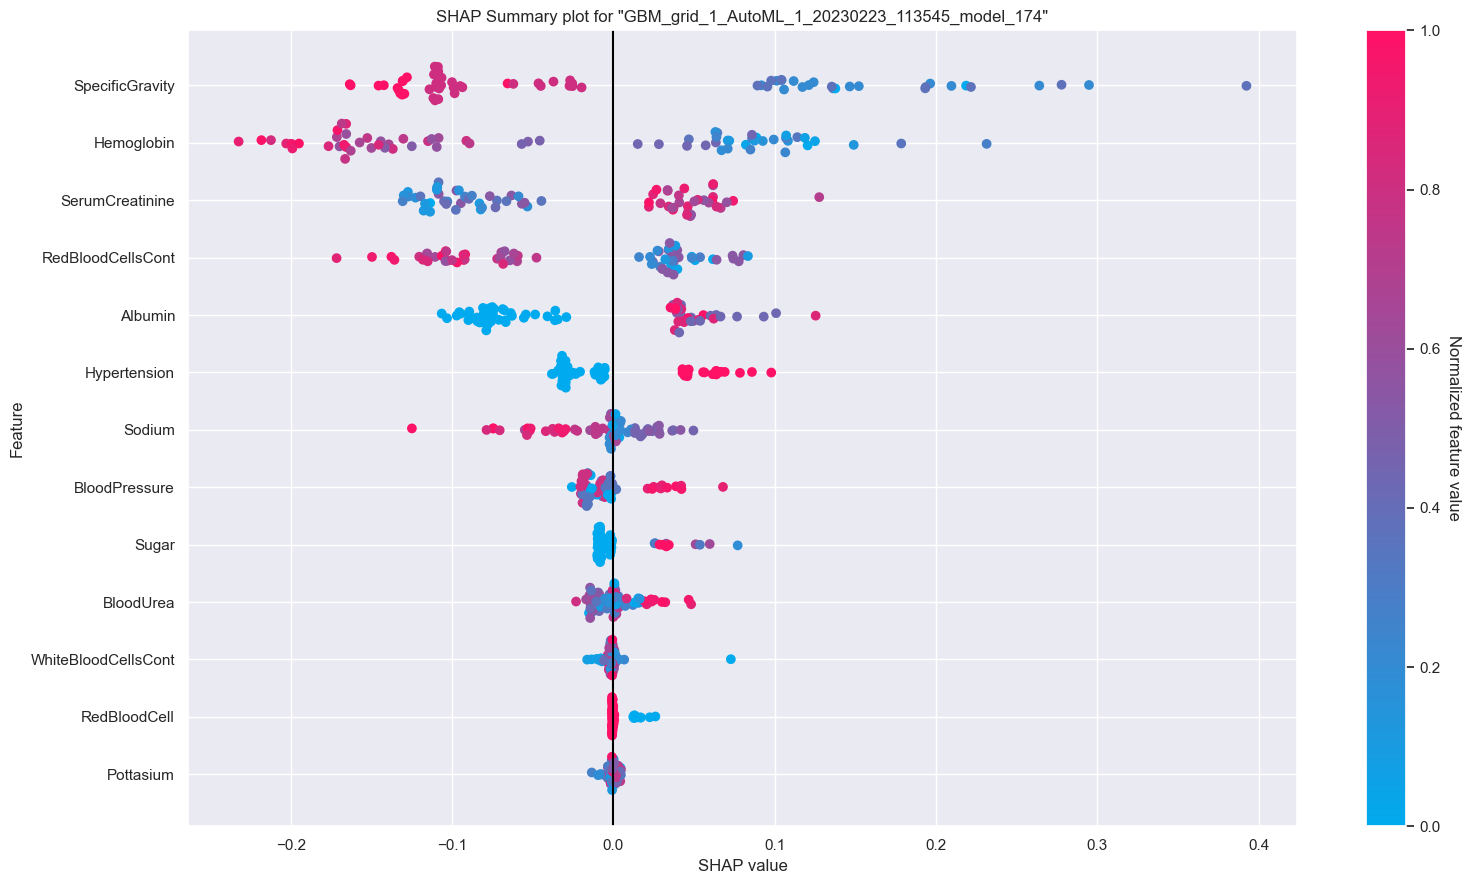

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

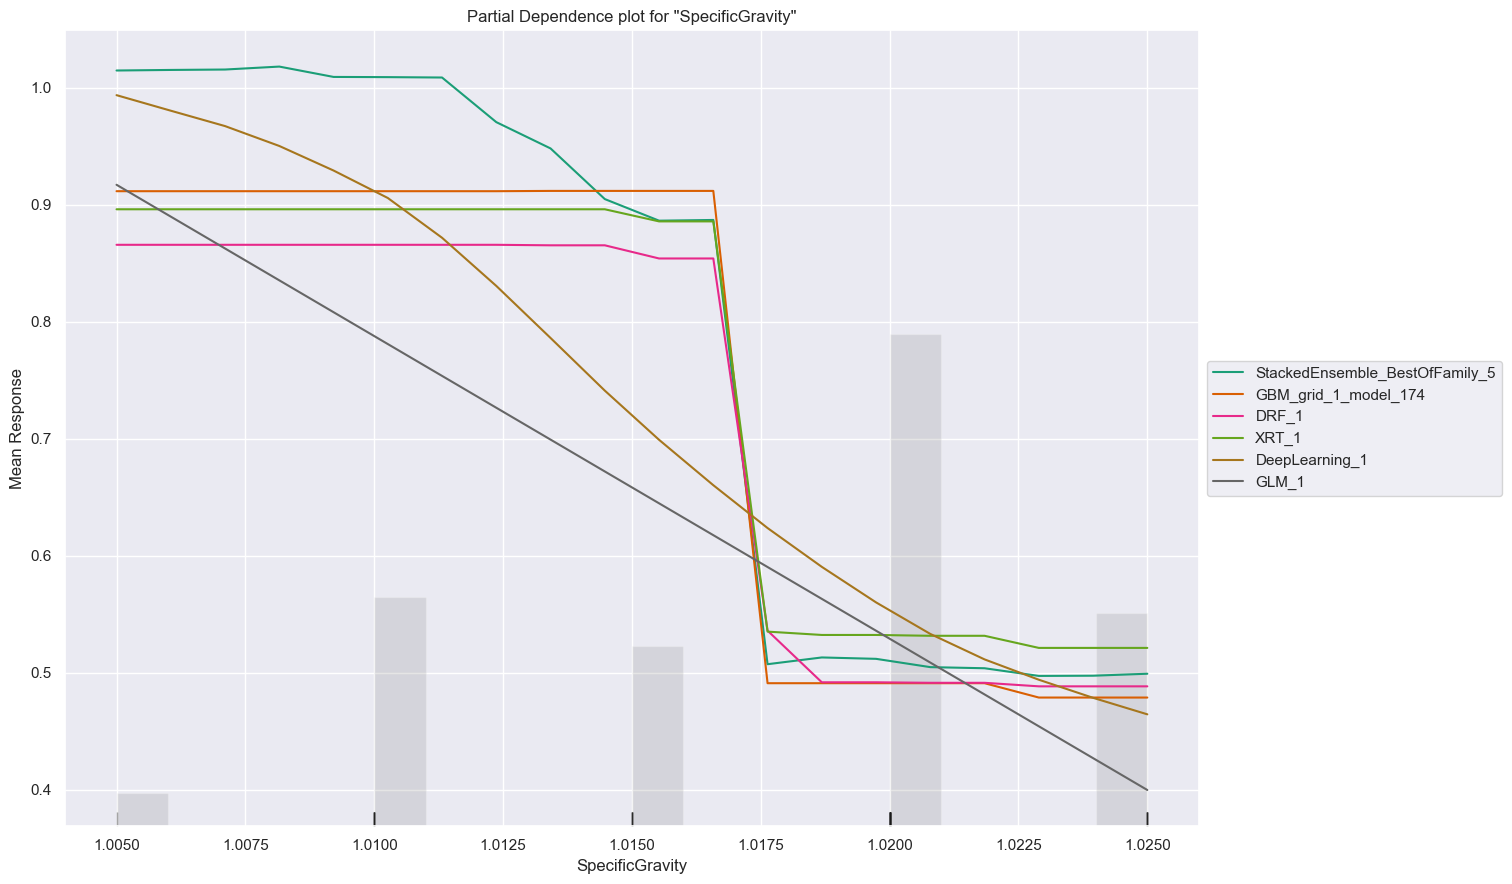

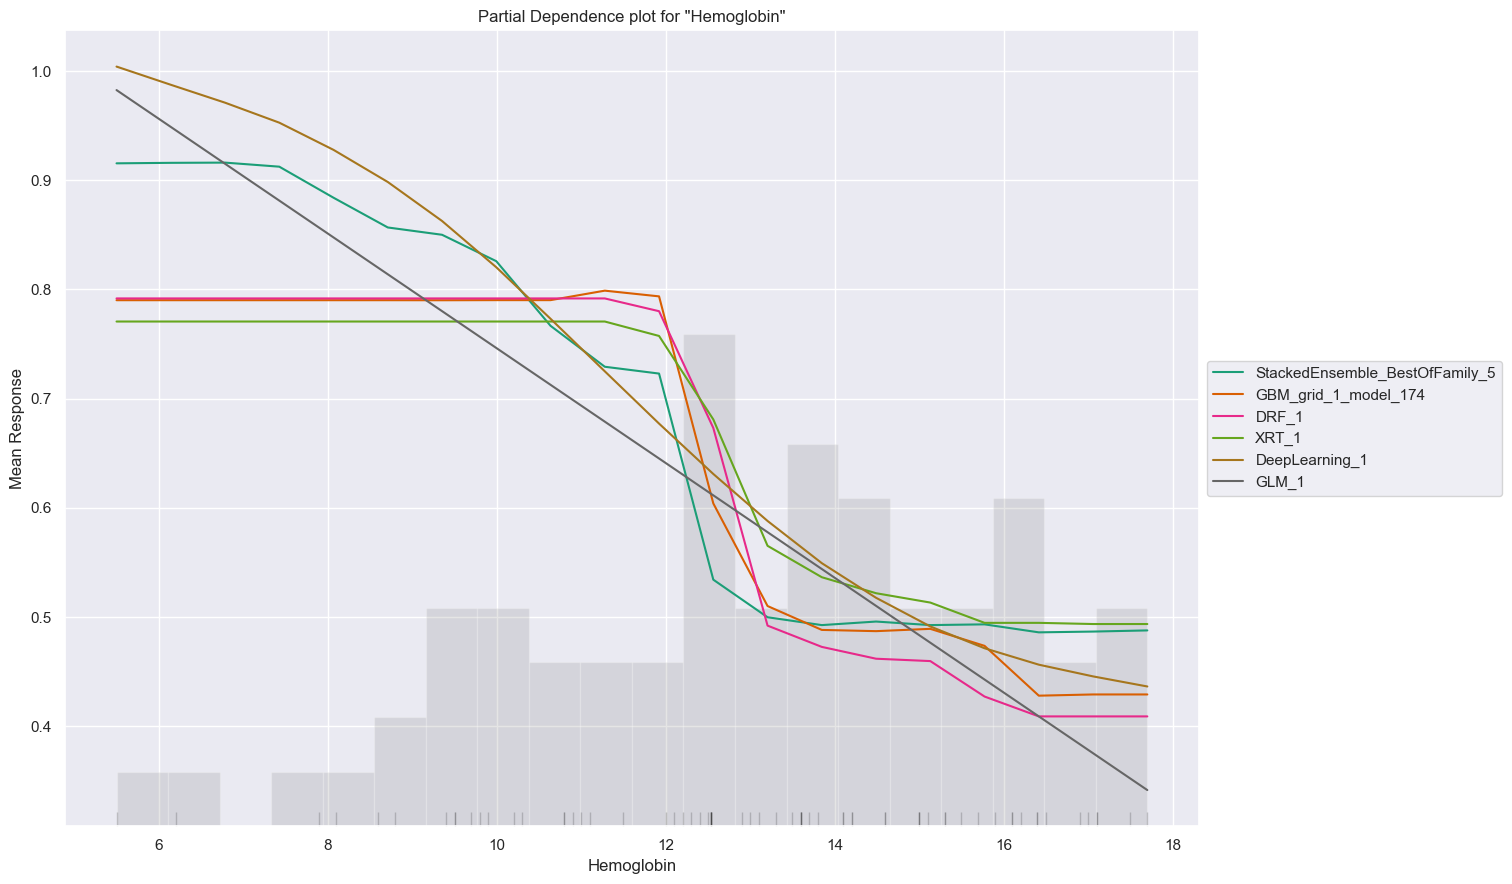

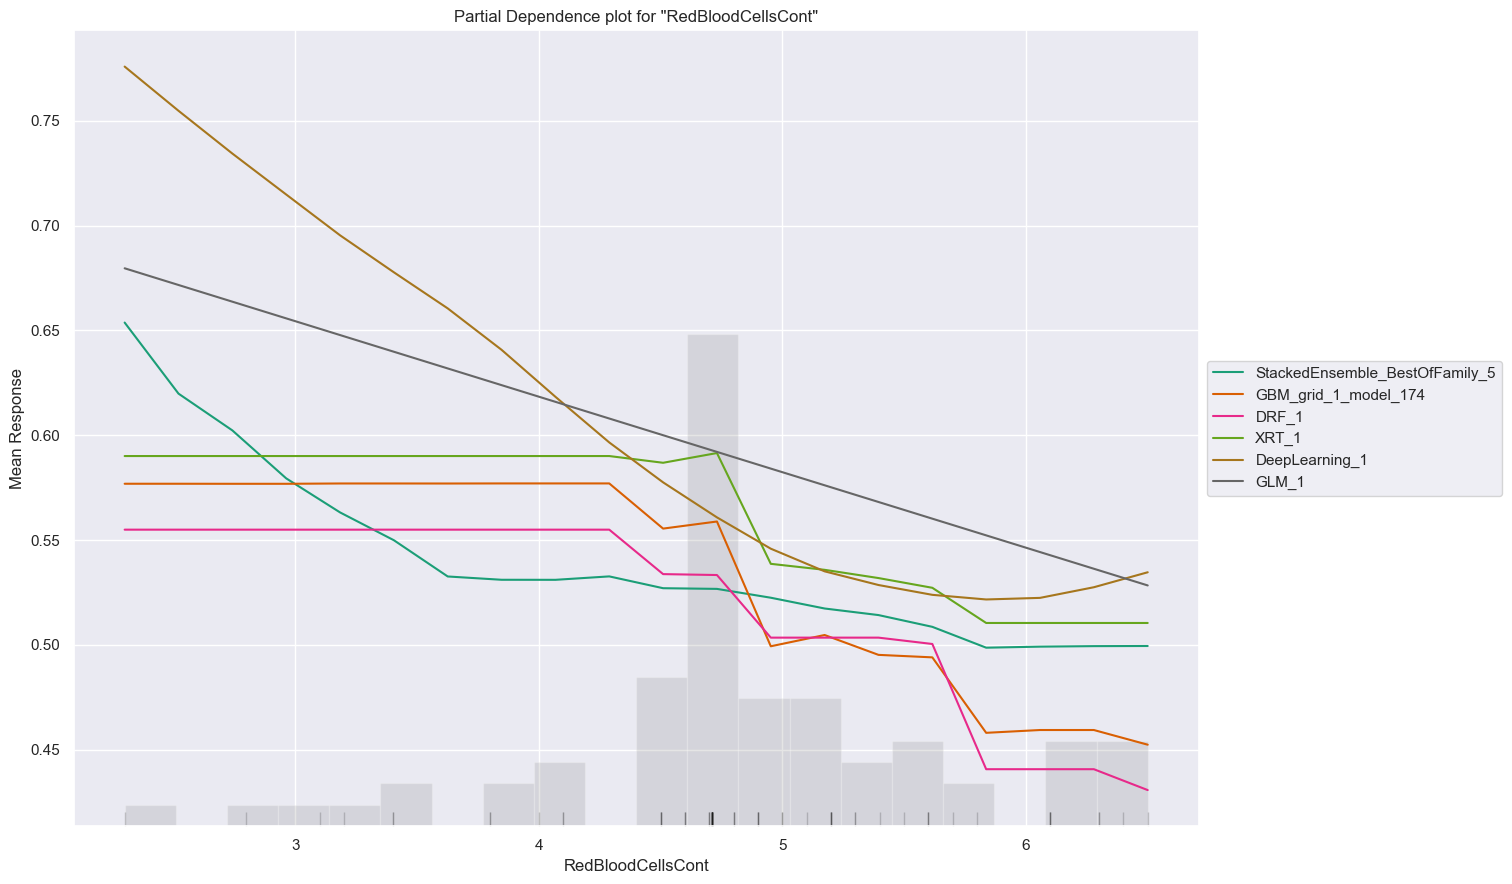

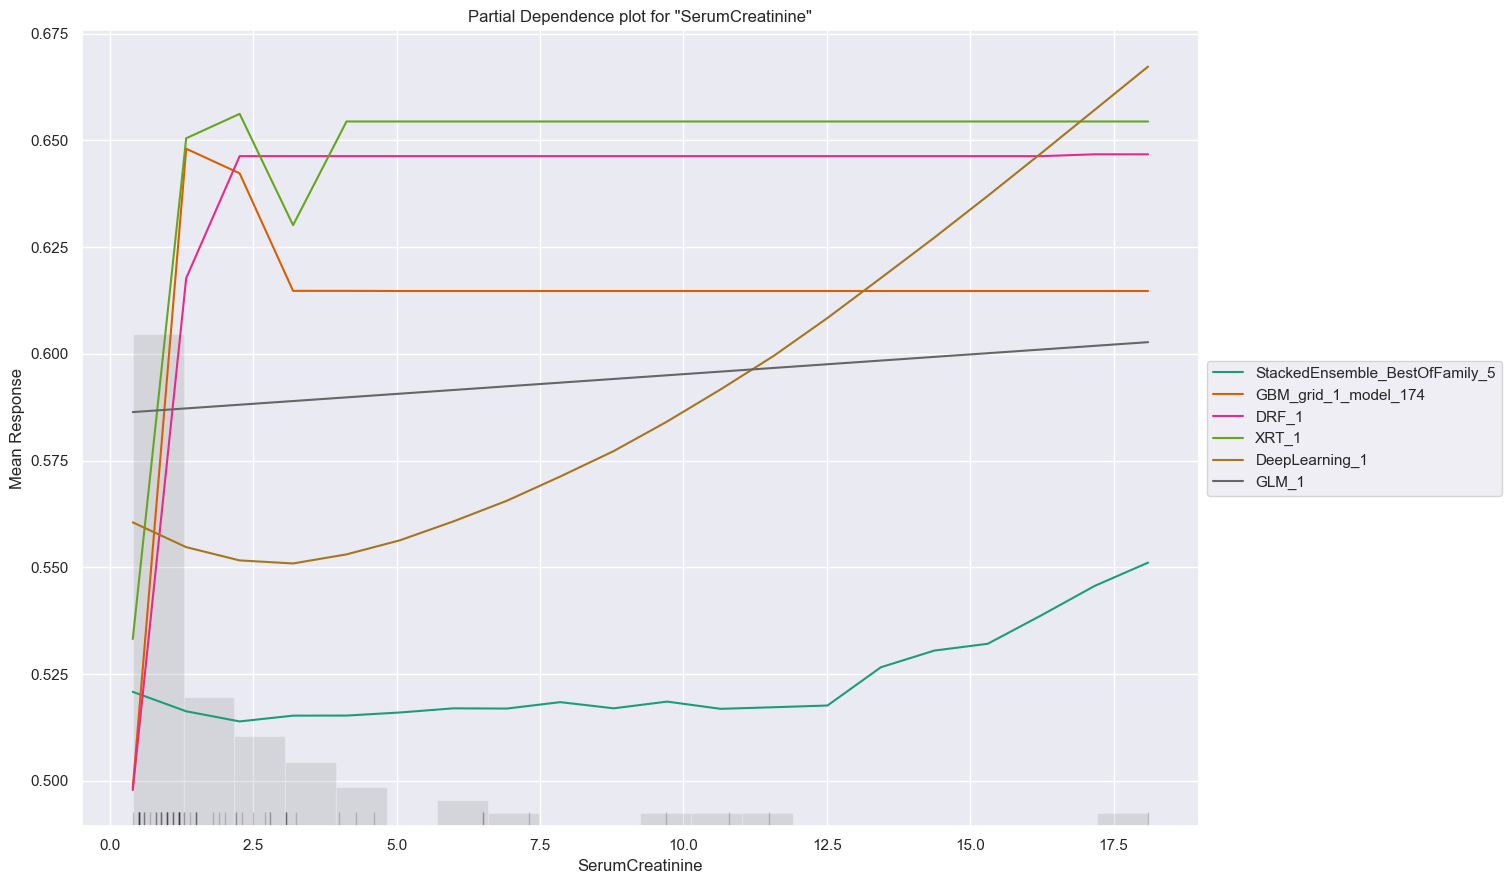

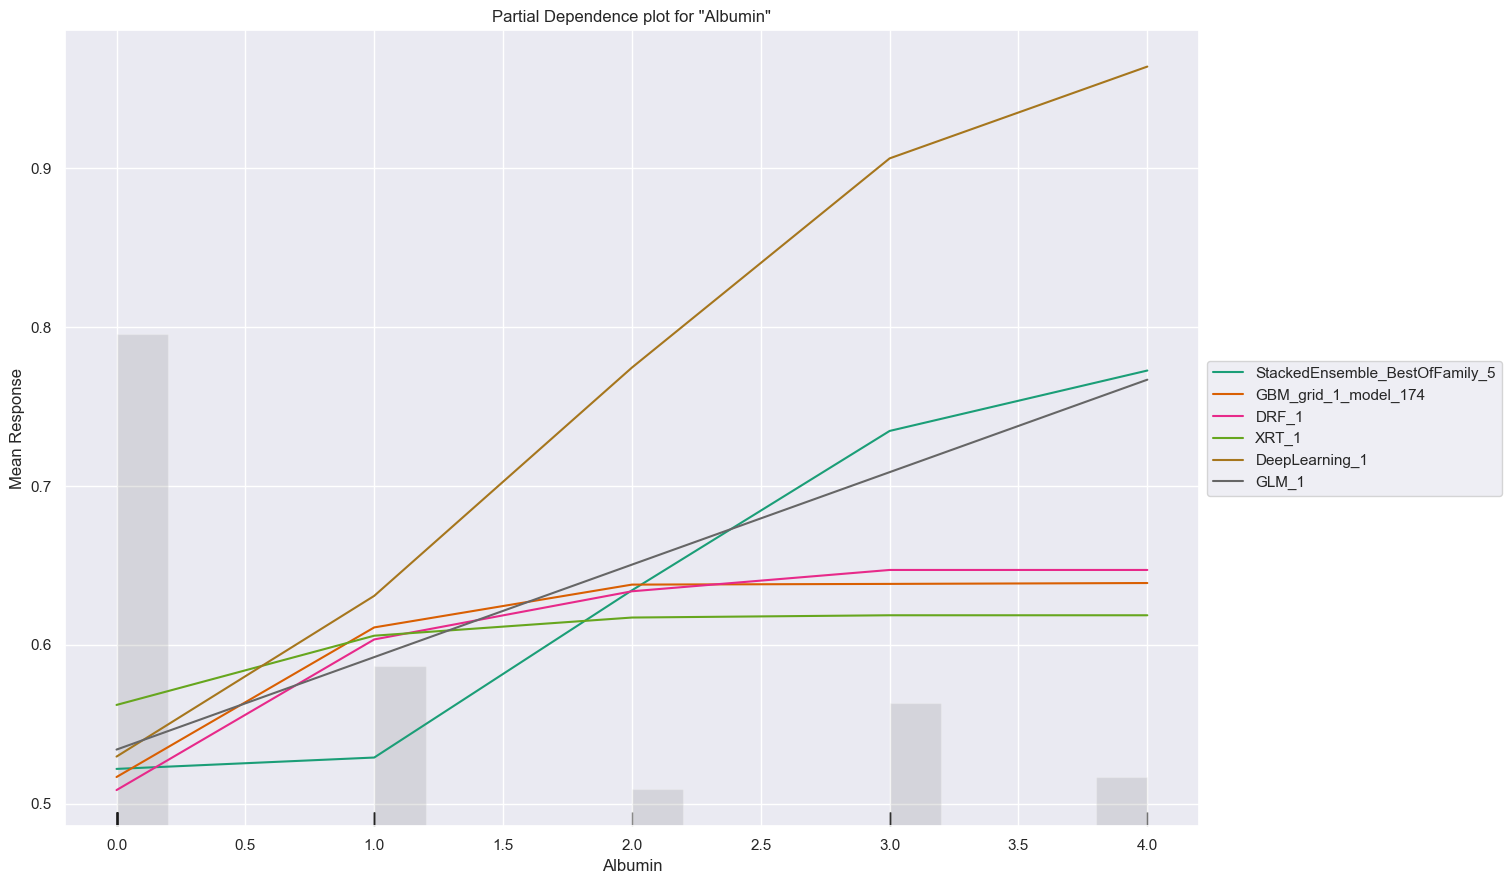

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

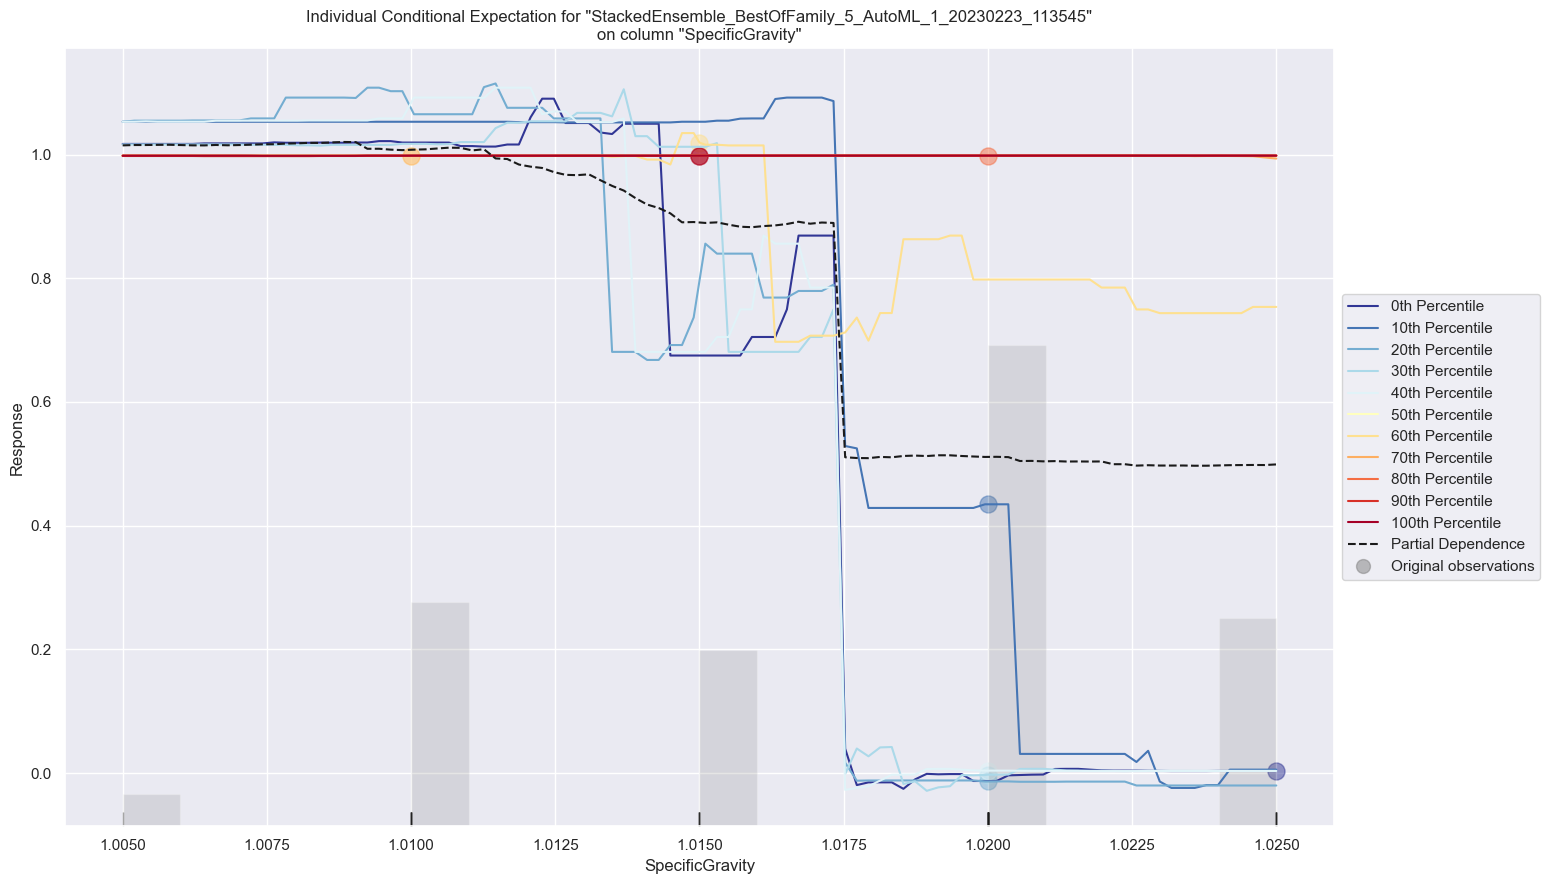

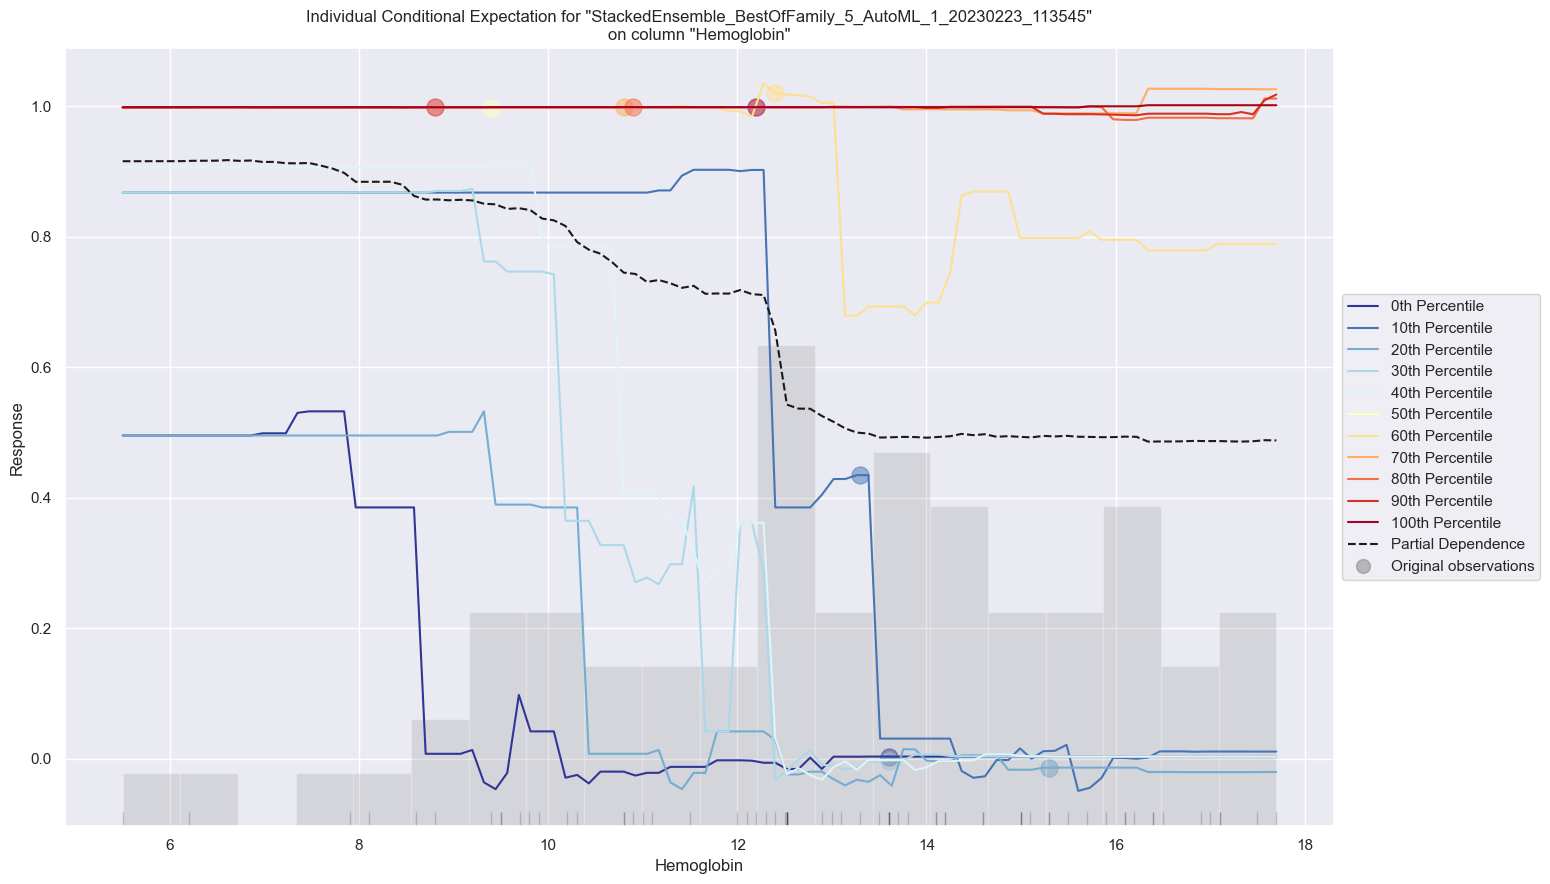

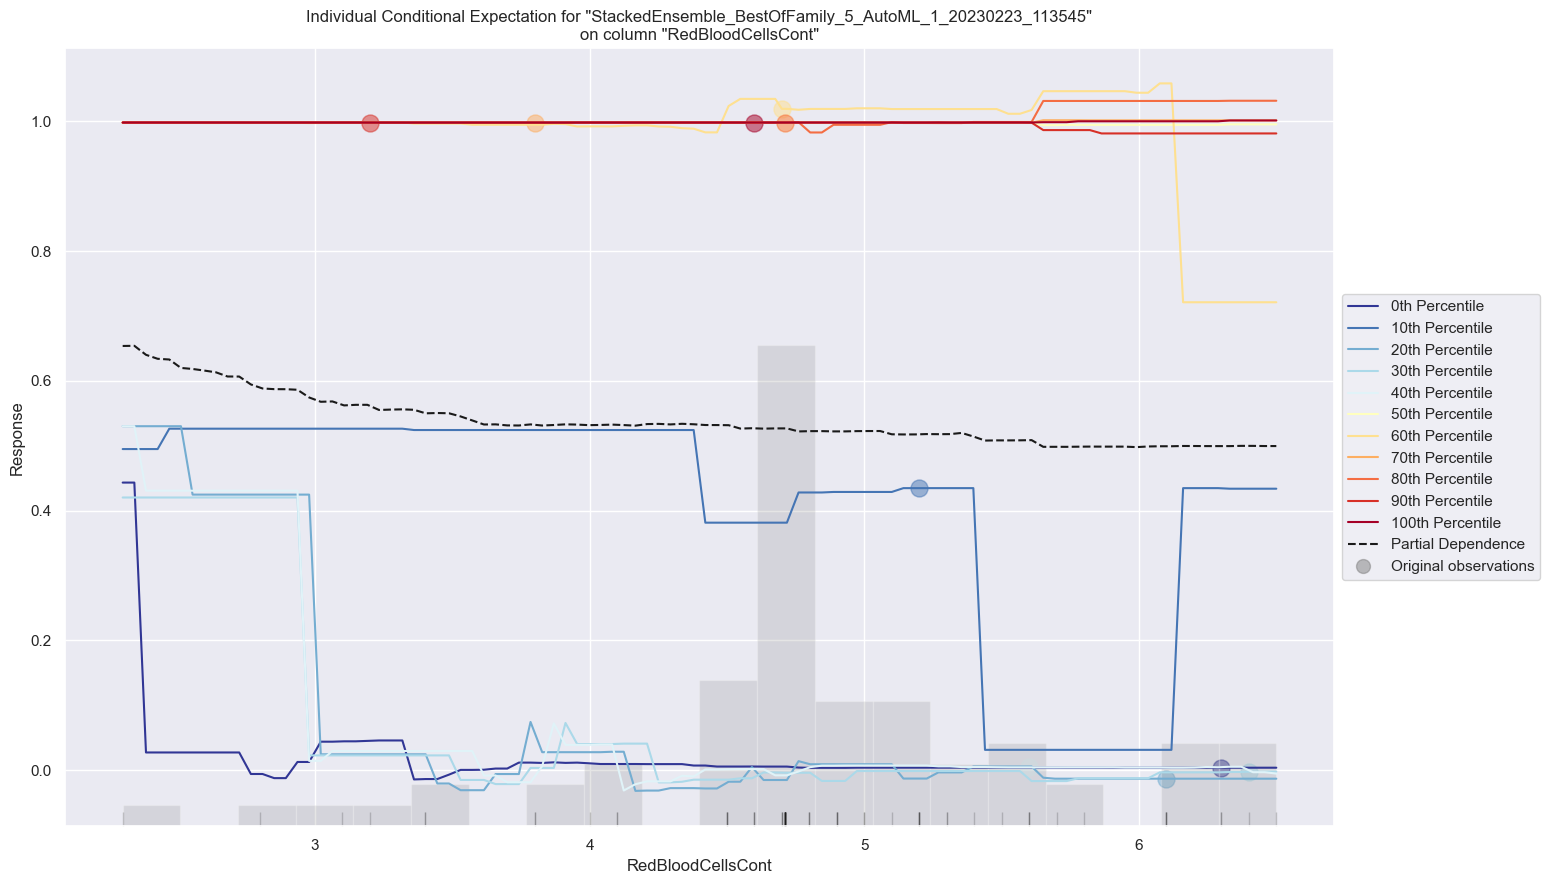

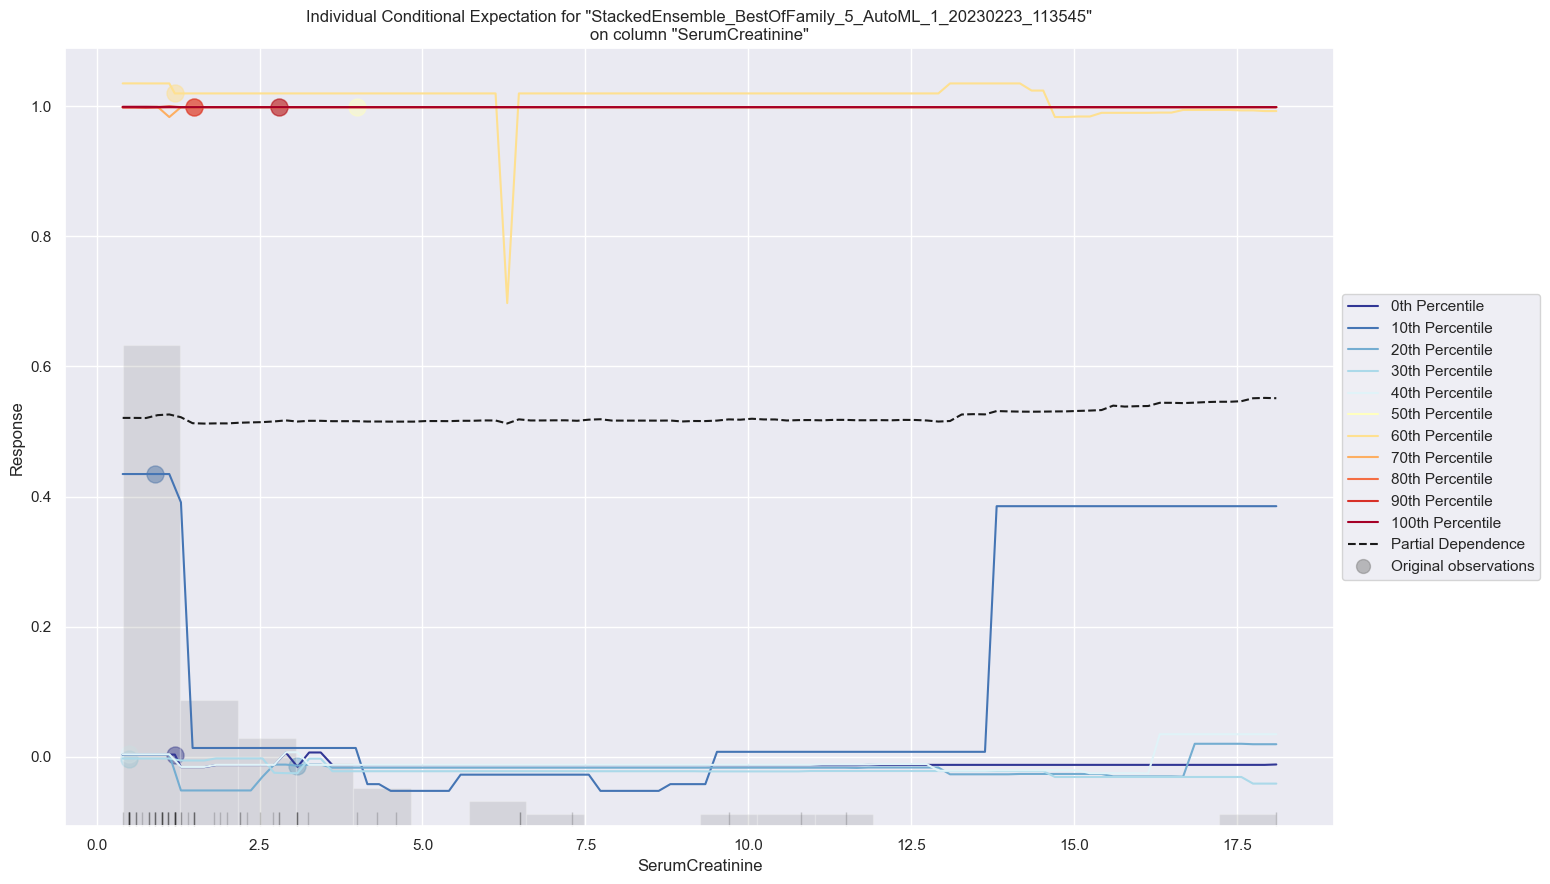

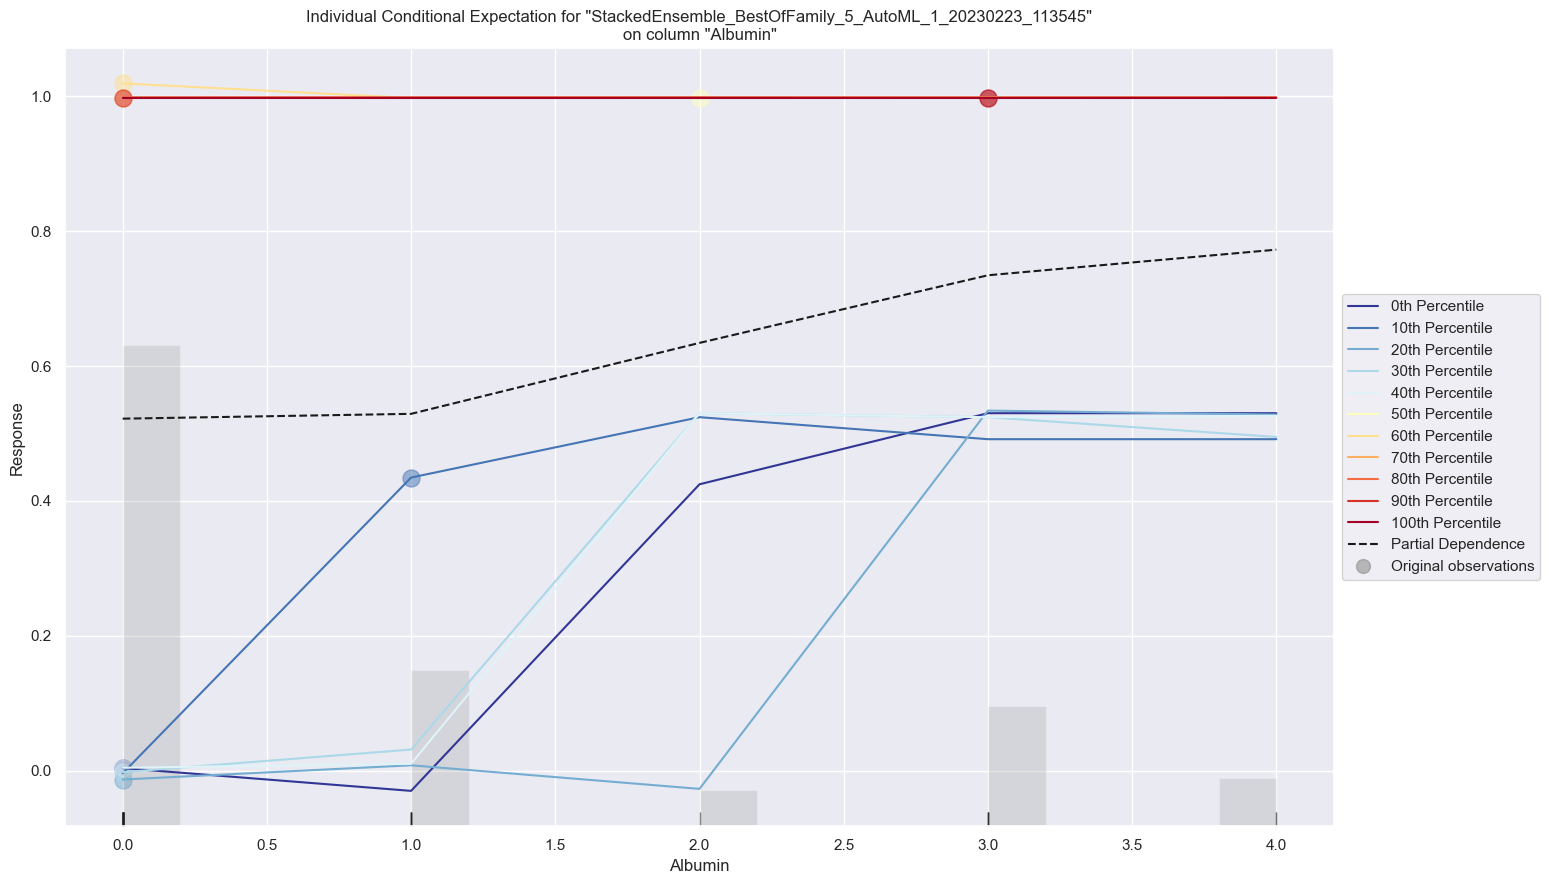

In [54]:
#calling explain method(The explain method generates explanations for the predictions made by the best model identified by the AutoML process.)
exa = aml.explain(df_test)

# Interpreting Best Model from AutoML

### Residual Analysis
Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the above graph that residuals are normally distributed. Visuals signify that residuals don't have heteroscedasticity since the plot has striped lines and there is no cone shaped residual plot.

### SHAP Summary
From the SHAP summary diagram, we can interpret a few conclusions -

1. All the features are listed as per their importance in making the prediction, that is Specific Gravity is more significant followed by Hemoglobin, and so on. Hence, Potassium is the least significant predictor in our model.
2. The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see person having highest specific highest gravity is more prone to chronic kidney disease. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - Higher the specific gravity more will be the chances of person being prone to disease, a lower the Hemoglobin in the body results in high chances of disease, and so on. As we can see the distribution of red points in the Specific gravity and hemoglobin features are far more spread than the blue points. From this visual, we can interpret that the chances of person getting disease increases as the Specific Gravity in blood increases. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect in predicting the kidney disease.
The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

### Partial Dependence Plot (PDP)
A partial dependence plot shows the marginal effect of a feature on the target(Chronic Kidney Disease in out dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP.

For Interpretation purposes, let us pick up the two most important variables - Specific Gravity and Hemoglobin.

1. As we can see that when the rest of the variables are kept constant and a marginal change is made in Hempglobin, we can see the mean response decreases between alcohol levels of 12 to 18.

2. Similarly when the rest of the variables are kept constant and a marginal change is made in Specific Gravity we can observe the mean response of quality going down between the  range of 1.0150 to 0.0175 . Hence, it can be interpreted that this range is deciding factor in the predicting disease.

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.

### ICE (Individual Conditional Expectation) Plot
ICE plot is similar to what we did in the PDP plot, but the fundamental difference between the two methods is that the PDP plot focuses on the average effect of a feature and does not focus on a specific instance. ICE plot comes in rescue to address this drawback of the PDP plot where the outputs from all instances are considered instead of an average value.

Let us go back to the Hemoglobin and Specific Gravity, as we interpreted in PDP the person having diseases decreases  when alcohol and sulfate value is between 12 to 18 and 1.0150 to 0.0175  respectively. But is this true for every individual in the dataset? ICE plot has an answer to this question. 

Each line in an ICE plot represents the predicted value of the response variable for a single instance as the predictor variable changes. By looking at these lines together, you can get a sense of how the relationship between the predictor and response variables varies across different instances in the dataset.

As we can see in the ICE plot above the Chronic Kidney Disease parameter(target variable) of a few instances in data set(0th percentile instance) is constant first and decreases in this range while the target variable of a few instances doesn't change much(100th Percentile Instance).

Individual conditional expectation curves are even more intuitive to understand than partial dependence plots. One line represents the predictions for one instance if we vary the feature of interest.

In [55]:
# OLS model Library
import statsmodels.formula.api as smf  

In [56]:
# converts an H2O data frame object (df) into a pandas data frame object (pandas_df).
import h2o

pandas_df = h2o.as_list(df)

In [57]:
# statsmodels package for statistical analysis
results = smf.ols(
    "ChronicKidneyDisease ~ BloodPressure+SpecificGravity+Albumin+Sugar+SerumCreatinine+BloodUrea+Sodium+Pottasium+Hemoglobin+RedBloodCellsCont+WhiteBloodCellsCont+Hypertension",
    data=pandas_df,
).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ChronicKidneyDisease   R-squared:                       0.713
Model:                              OLS   Adj. R-squared:                  0.704
Method:                   Least Squares   F-statistic:                     80.14
Date:                  Thu, 23 Feb 2023   Prob (F-statistic):           5.52e-97
Time:                          11:40:40   Log-Likelihood:                -27.717
No. Observations:                   400   AIC:                             81.43
Df Residuals:                       387   BIC:                             133.3
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              30.7647      3.043     10.110      0.000      24.782      36.748
BloodPressure           0.0021      0.001      2.033      0.043    6.97e-05       0.004
SpecificGravity       -28.6271      3.018     -9.484      0.000     -34.562     -22.693
Albumin                 0.0554      0.014      4.058      0.000       0.029       0.082
Sugar                   0.0219      0.014      1.561      0.119      -0.006       0.050
SerumCreatinine         0.0031      0.004      0.863      0.389      -0.004       0.010
BloodUrea              -0.0010      0.000     -2.650      0.008      -0.002      -0.000
Sodium                 -0.0026      0.002     -1.295      0.196      -0.006       0.001
Pottasium               0.0017      0.005      0.317      0.751      -0.009       0.012
Hemoglobin             -0.0660      0.008     -8.270      0.000      -0.082      -0.050
RedBloodCellsCont      -0.0228      0.023     -1.006      0.315      -0.067       0.022
WhiteBloodCellsCont  4.412e-06   5.48e-06      0.804      0.422   -6.37e-06    1.52e-05
Hypertension            0.1664      0.036      4.584      0.000       0.095       0.238
==============================================================================
Omnibus:                       22.183   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.004
Skew:                           0.320   Prob(JB):                     0.000910
Kurtosis:                       2.343   Cond. No.                     2.85e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Note:__
results.summary(): This line prints a summary of the regression results to the console. The summary method is called on the results object, which generates a report that includes information such as the coefficients and standard errors of the regression equation, goodness-of-fit measures, and diagnostic statistics. This summary report can be useful for understanding the relationships between the dependent and independent variables, and for assessing the quality of the regression model.

# Does the model make sense?
## Model Assumptions
- We can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. Here no heteroscadasticity is observed in the residual plot, hence this assumption is not violated.
- If we look closely at the Heat map- We can see that from the plots, we do not have much high correlation between features.
- If we look closely at the Pair-Plot - we can notice that every predictor  variable has linear relationship with the target variable.
- Here the Durbin- Watson value is 1.366, which signifies that there is positive autocorrelation in our data, hence this assumption is not violated.
- Based on the distributions I described earlier, it is possible that some of the variables violate the assumption of normality. For example, potassium, blood urea have positively skewed distributions, which could lead to non-normality of the residuals in a linear regression model.

# Hyperparameter Tuning - Random Grid Search on GBM Model

The goal of hyperparameter tuning is to find the hyperparameters that produce the best performance on the test set, while avoiding overfitting on the training set. It is an important step in the machine learning pipeline, as the choice of hyperparameters can have a significant impact on the accuracy and generalization of a machine learning model.

In [58]:
#train test and split
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [59]:
# The values of these keys are lists that contain different values for each hyperparameter that can be used to train a gradient boosting machine (GBM) model.
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

The purpose of creating this dictionary is to specify a grid of __hyperparameters__ that can be used to train a GBM model. The ranges are taken randomly for each parameter(by printing each parameter you can understand the ranges). By combining different values for each hyperparameter, we can search for the combination that yields the best performance on a validation set. This process is known as __hyperparameter tuning__, and it's a common technique used to improve the performance of machine learning models.

In [60]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

Together, these search criteria specify a random search process that will train a maximum of 36 GBM models, randomly sampling hyperparameters from the grid defined in gbm_parameters. The goal of this process is to find the combination of hyperparameters that yields the best performance on a validation set, in order to create a __well-performing GBM model__.

In [61]:
#  creating the H2OGridSearch object
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [62]:
# calling the train() method of the H2OGridSearch object and passing in the training data and validation data as arguments. 
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,0.0089495
,0.1,0.07,7.0,0.8,gbm_grid2_model_9,0.0101230
,0.1,0.08,3.0,0.8,gbm_grid2_model_13,0.0116451
,0.1,0.06,8.0,0.9,gbm_grid2_model_34,0.0118663
,0.2,0.04,5.0,0.9,gbm_grid2_model_29,0.0128562
,0.6000000,0.1,4.0,1.0,gbm_grid2_model_22,0.0159186
,0.5,0.1,4.0,0.8,gbm_grid2_model_33,0.0159338
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,0.0164776
,0.6000000,0.09,2.0,0.8,gbm_grid2_model_19,0.0170875
,0.5,0.05,2.0,0.8,gbm_grid2_model_27,0.0176490


In [65]:
#access information about best model
gbm_gridperf2 = gbm_grid2.get_grid()

In [64]:
print(gbm_gridperf2)

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate     learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  ------------------  ------------  -----------  ------------------  ------------------  --------------------
     0.5                 0.1           9.0          1.0                 gbm_grid2_model_7   0.008949481680048738
     0.1                 0.07          7.0          0.8                 gbm_grid2_model_9   0.010123041113869278
     0.1                 0.08          3.0          0.8                 gbm_grid2_model_13  0.011645139747136986
     0.1                 0.06          8.0          0.9                 gbm_grid2_model_34  0.011866306516797
     0.2                 0.04          5.0          0.9                 gbm_grid2_model_29  0.01285623308206465
     0.6000000000000001  0.1           4.0          1.0                 gbm_grid2_model_22  0.01591863897197201
     0.5                 0.1    

#### Observations:
The output is clearly seen that hyper-parameter search summary is ordered by increasing residual_deviance there by indicating the order of best performing models sorted by its performance 

In [66]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

#### Observations
The list_hyperparameters list contains 36 dictionaries, each representing the hyperparameters for a different GBM model generated by the grid search. These hyperparameters can then be used to train and evaluate the models.

In [67]:
models = gbm_gridperf2.models

In [74]:
#printing the list of models residual_deviance
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [79]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [80]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [81]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.5        0.10          9          1.0           0.008949
1               0.1        0.07          7          0.8           0.010123
2               0.1        0.08          3          0.8           0.011645
3               0.1        0.06          8          0.9           0.011866
4               0.2        0.04          5          0.9           0.012856
5               0.6        0.10          4          1.0           0.015919
6               0.5        0.10          4          0.8           0.015934
7               0.4        0.08          6          0.9           0.016478
8               0.6        0.09          2          0.8           0.017087
9               0.5        0.05          2          0.8           0.017649
10              0.3        0.03          8          1.0           0.017924
11              0.6        0.09          3          0.8           0.018025
12              0.5      

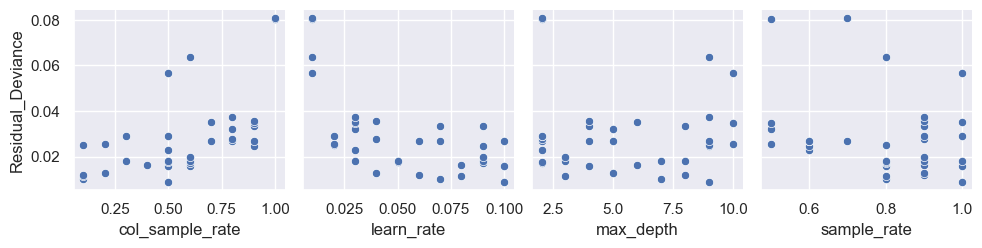

In [82]:
#plotting a grid of sctter plot
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

## Hyperparameter Tuning Analysis

- This is a summary of hyperparameter tuning for an XGBoost model, which involved a grid search over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. The search resulted in a total of 36 combinations of hyperparameters, and for each combination, the Residual Deviance was calculated as an evaluation metric.

- Based on the results, the hyperparameter combination with the lowest Residual Deviance was a model with col_sample_rate of 0.5, learn_rate of 0.1, max_depth of 9, and sample_rate of 1.0, with a Residual Deviance of 0.0089495. The next best models had Residual Deviances in the range of 0.01-0.02, while the worst-performing models had Residual Deviances above 0.056.

- In the case of comparing models, the worst performing model would have the highest residual deviance. This means that it has a poor fit to the data and is not able to explain the variation in the response variable as well as the other models

- Overall, the results suggest that the combination of col_sample_rate, learn_rate, max_depth, and sample_rate can have a significant impact on the performance of an XGBoost model, and that hyperparameter tuning can lead to significant improvements in model performance.

# Conclusion
Essentially, the purpose of AutoML is to automate the repetitive tasks like pipeline creation and hyperparameter tuning so that data scientists can spend more of their time on the business problem at hand. AutoML also aims to make the technology available to everybody rather than a select few. AutoML and data scientists can work in conjunction to accelerate the ML process so that the real effectiveness of machine learning can be utilized.

The following are actions performed in predicting the best model 
- Built a predictive model using H2O AutoML to predict if the person is prone to chronic kidney disease using certain     attributes.
- Studied the effects of Ridge and LASSO regularization on the GLM Model and recorded observations
- Studied the importance of variable using SHAP summary.
- Performed the hyperparameter tuning using Random Grid Search Method.

# Citations

1.Many techniques used in this notebook have been adopted from the following github repositories

Owner - AI Skunkworks
Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown
Link - https://github.com/nikbearbrown/

2.Automated Machine Learning with H20
Link - https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f

3.H20 AI Auto ML
Link - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html

4.Deep drive into H2O's AutoML
Link- https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e


# Licensing

Copyright 2023 Akshatha Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.